In [1120]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [1226]:
train = pd.read_csv("train.csv")

In [655]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [586]:
from collections import Counter
Counter(train.MSSubClass)

Counter({20: 536,
         30: 69,
         40: 4,
         45: 12,
         50: 144,
         60: 299,
         70: 60,
         75: 16,
         80: 58,
         85: 20,
         90: 52,
         120: 87,
         160: 63,
         180: 10,
         190: 30})

In [656]:
train_nas = np.sum(train.isna())
train_nas[train_nas>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [657]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

Text(0,0.5,'SalePrice')

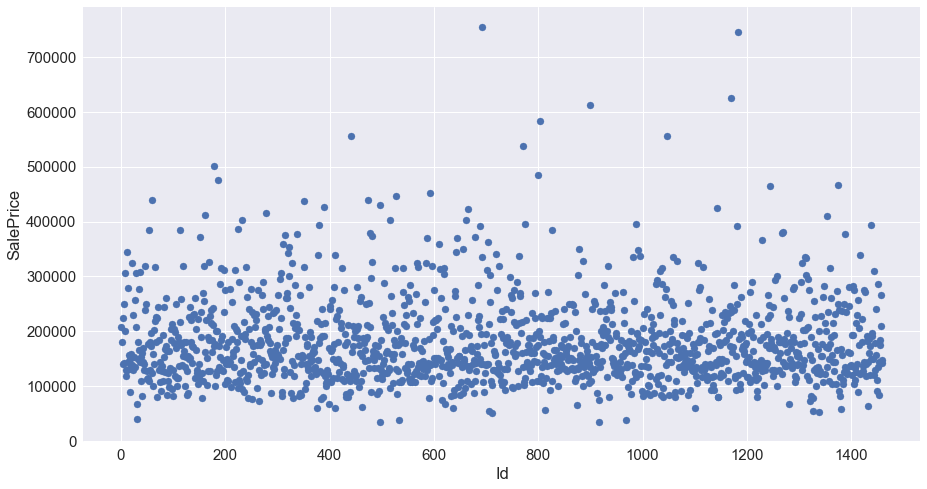

In [956]:
n = 0
plt.figure(figsize=(15,8))
plt.scatter(train.iloc[:,n],train['SalePrice'])
plt.xlabel(train.columns[n])
plt.ylabel('SalePrice')

#SalesPrice_mean = [np.mean(train['SalePrice'])]*len(train.columns[n])

#mean_line = ax.plot(train.columns[n],SalesPrice_mean, label='Mean', linestyle='--')


In [392]:
train.shape

(1460, 81)

In [659]:
np.histogram(train['SalePrice'])

(array([148, 723, 373, 135,  51,  19,   4,   3,   2,   2], dtype=int64),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]))

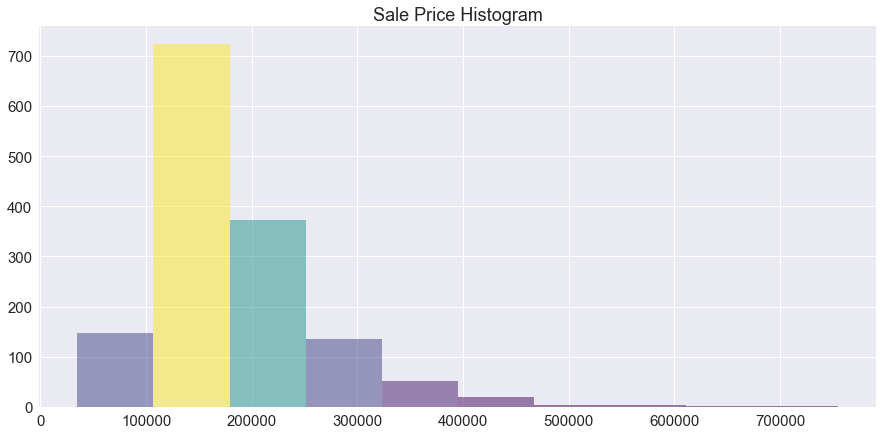

In [660]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(15, 7)) #setting size of plot
n, bins, patches = plt.hist(train['SalePrice'], facecolor='blue', alpha=0.5) #matplotlib histogram
plt.title("Sale Price Histogram")
#color coding by height
fracs = n / n.max() 
#normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
#loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

Text(0.5,1,'SalePrice distribution')

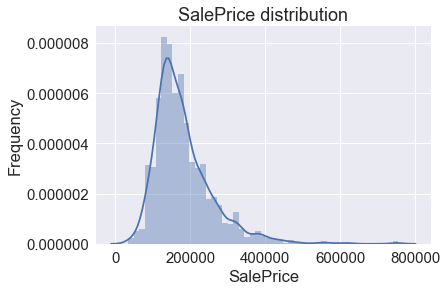

In [1025]:
#looking at saleprice distribution and skewness
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

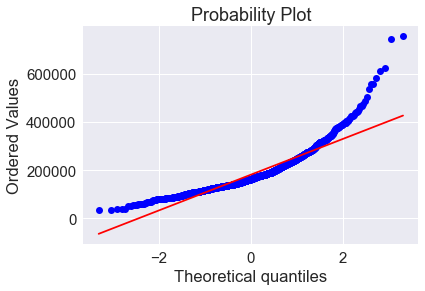

In [1033]:
#QQ plot
#res = stats.probplot(train['SalePrice'], plot=plt) # does not show array and numbers
stats.probplot(train['SalePrice'], plot=plt)

In [1059]:
np.mean(train.SalePrice)

180921.19589041095

In [1060]:
#checking sigma
np.std(train.SalePrice)

79415.29188606751

In [1227]:
train.SalePrice = np.log1p(train.SalePrice)

In [1228]:
#need to normalize SalePrice for models
#doing log transformation

np.mean(train.SalePrice)

12.024057394918371

In [1229]:
np.std(train.SalePrice)

0.39931245219387496

Text(0.5,1,'SalePrice distribution')

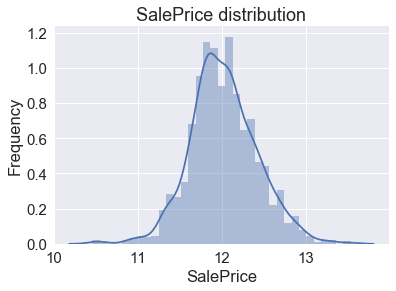

In [1230]:
#looking at saleprice distribution and skewness
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([2.43888384, 2.43990491, 2.44605376, ..., 2.66343679, 2.67560548,
         2.67652328])),
 (0.030572300197789427, 2.5663280259246517, 0.9954851812690027))

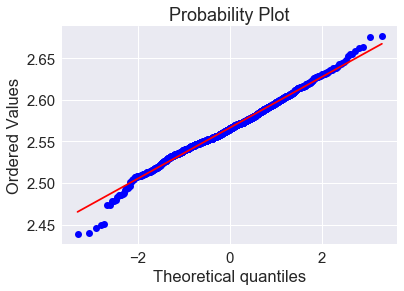

In [1211]:
#QQ plot
#res = stats.probplot(train['SalePrice'], plot=plt) # does not show array and numbers
stats.probplot(train['SalePrice'], plot=plt)

Text(0.5,1,'Null Values Count')

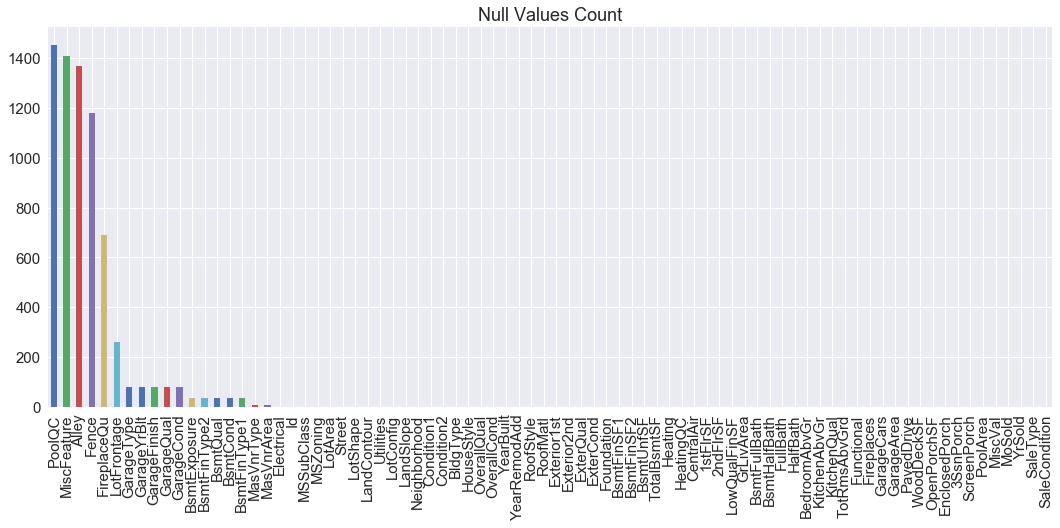

In [661]:
fig, ax = plt.subplots(figsize=(18, 7))
train.isnull().sum().nlargest(80).plot(kind='bar')
plt.title("Null Values Count")

In [399]:
data_summary=train.describe()

In [403]:
data_summary.to_csv('data_summary.csv')

In [292]:
#labels,levels = pd.factorize(train.Alley)
#labels.nunique()

Text(0,0.5,'SalePrice')

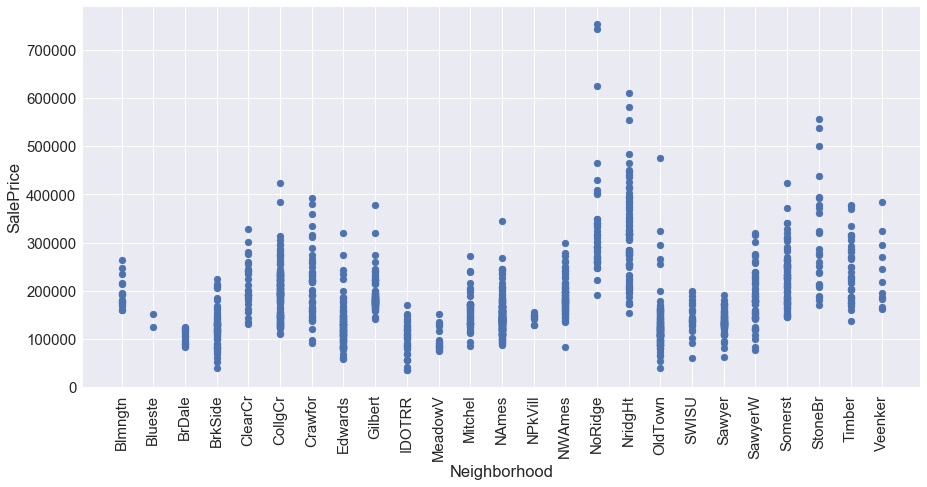

In [385]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
plt.figure(figsize=(15,7))
plt.scatter(train['Neighborhood'],train['SalePrice'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

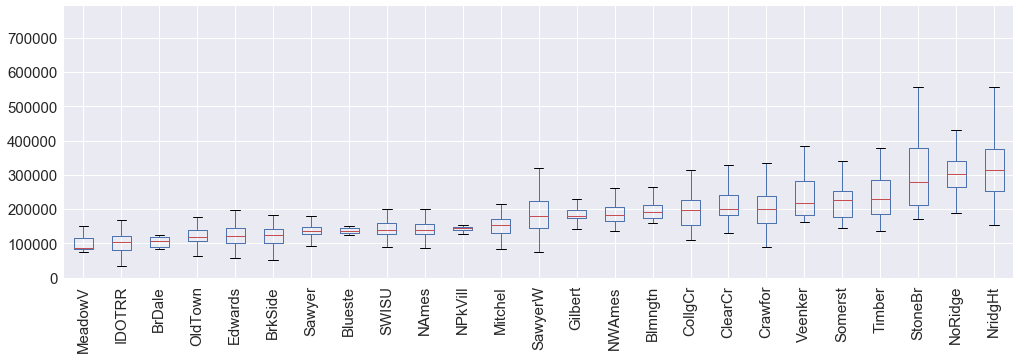

In [384]:
#creating pandas boxplot and usinfg function to sort values
def boxplot_sorted(df, by, column, rot=90):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", figsize = (17,5))
axes = boxplot_sorted(train, by=["Neighborhood"], column="SalePrice")

#train.boxplot(column = 'SalePrice', by ='Neighborhood', figsize = (17,8), rot = 90) #pandas boxplot unsorted

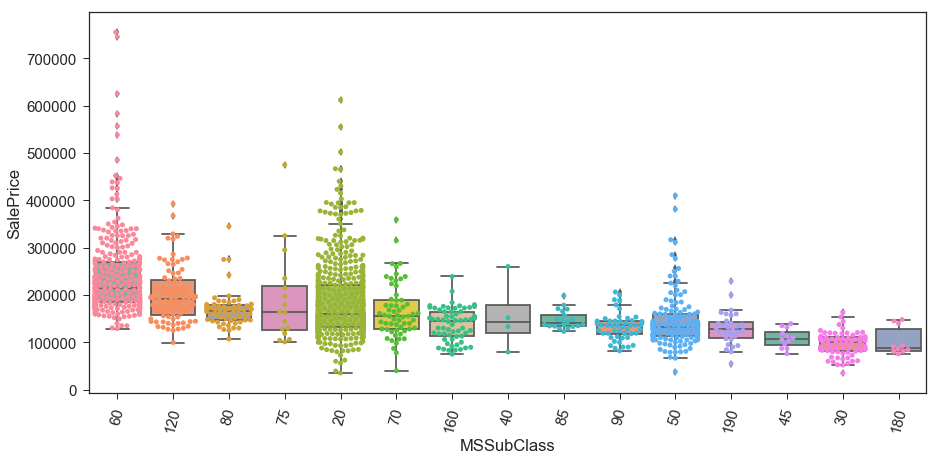

In [495]:
MSSubClass_grp = train.groupby(['MSSubClass']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting zones based on prices for boxplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='MSSubClass', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12), order=MSSubClass_grp.index)
sns.swarmplot(x='MSSubClass', y='SalePrice', data=train, order=MSSubClass_grp.index)

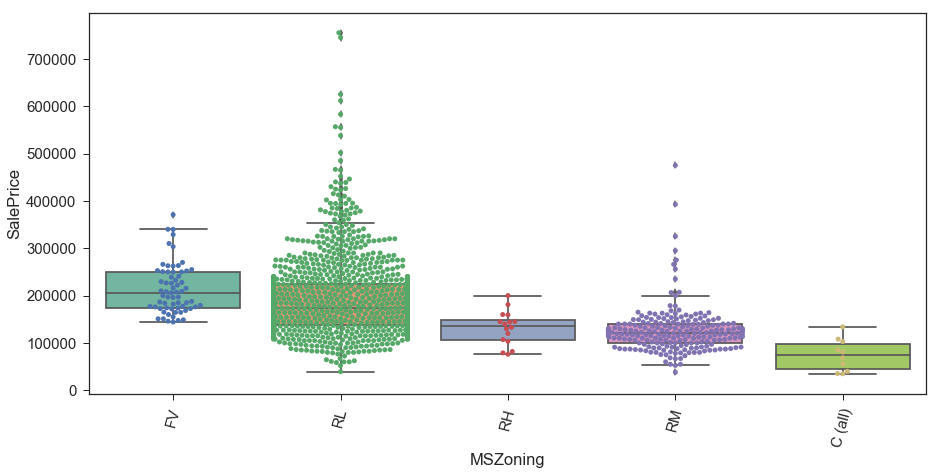

In [445]:
Zoning = train.groupby(['MSZoning']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting zones based on prices for boxplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='MSZoning', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12), order=Zoning.index)
sns.swarmplot(x='MSZoning', y='SalePrice', data=train, order=Zoning.index)

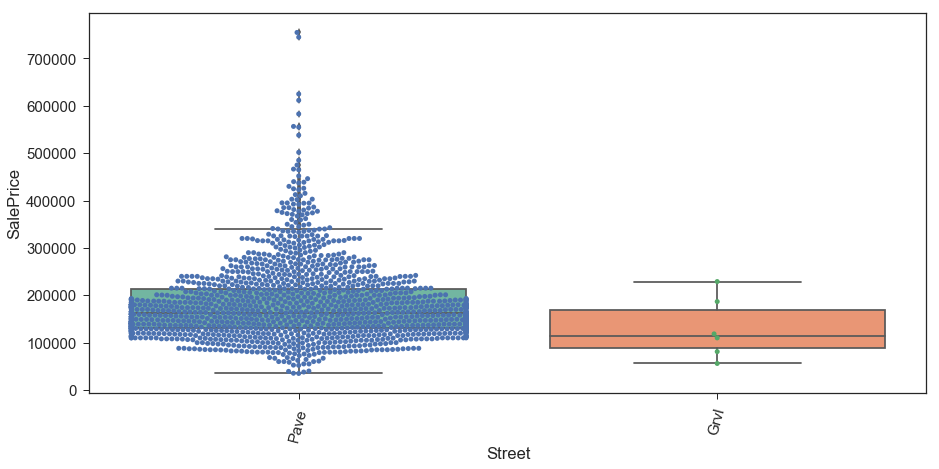

In [417]:
#Street_type = train.groupby(['Street']).agg(['median'])['SalePrice'].sort_values('median',ascending=False) #sorting street type based on prices for boxplot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='Street', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12))
sns.swarmplot(x='Street', y='SalePrice', data=train)

In [358]:
train['MSZoning'].nunique()

5

Text(0,0.5,'SalePrice')

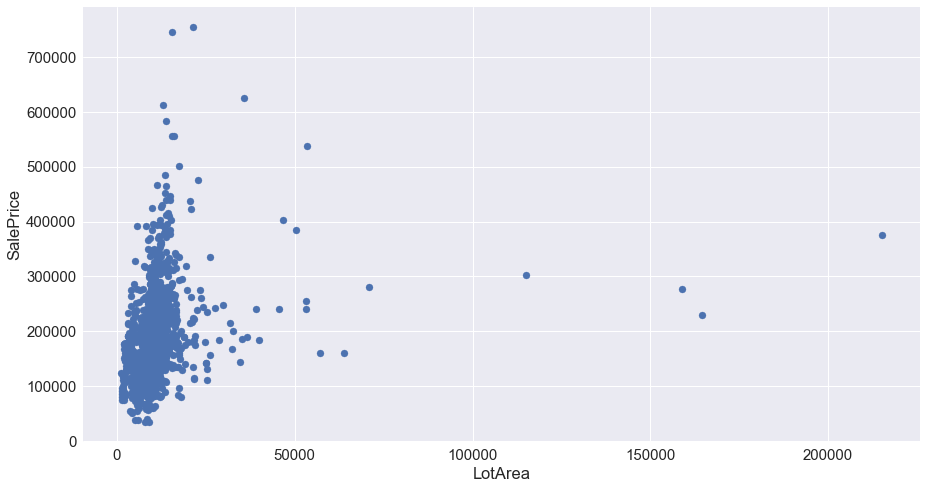

In [405]:
plt.figure(figsize=(15,8))
plt.scatter(train['LotArea'],train['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

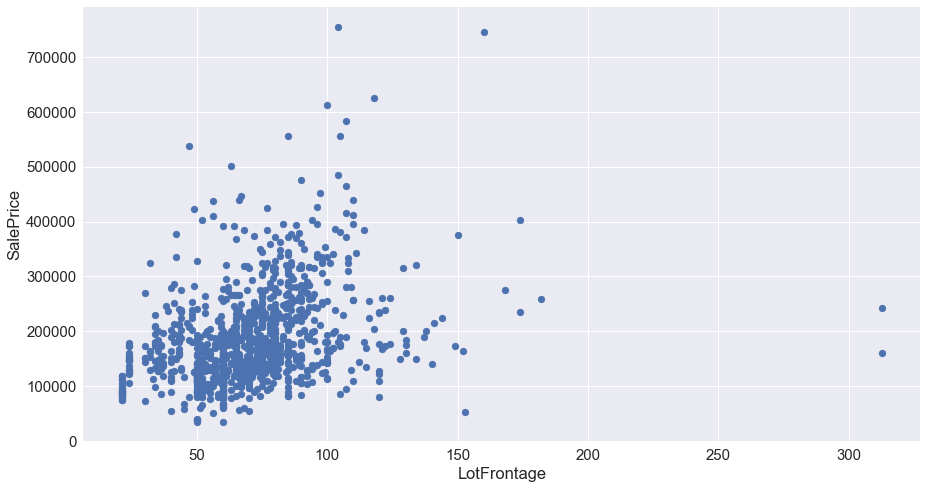

In [496]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['LotFrontage'],train['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

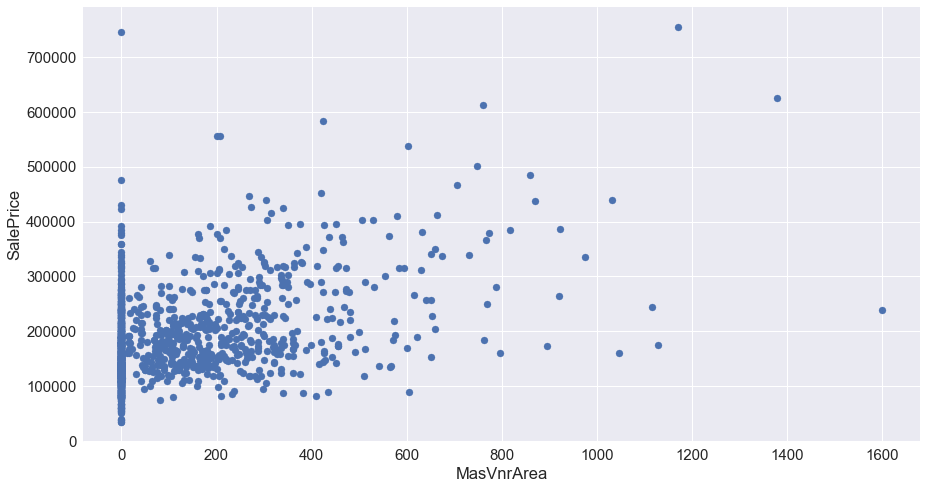

In [497]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['MasVnrArea'],train['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

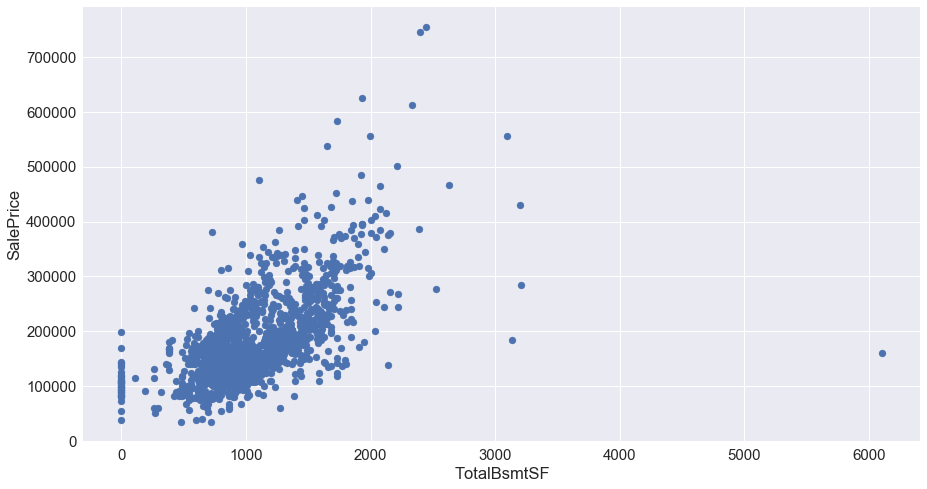

In [499]:
#plotting iwth missing values as is
plt.figure(figsize=(15,8))
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

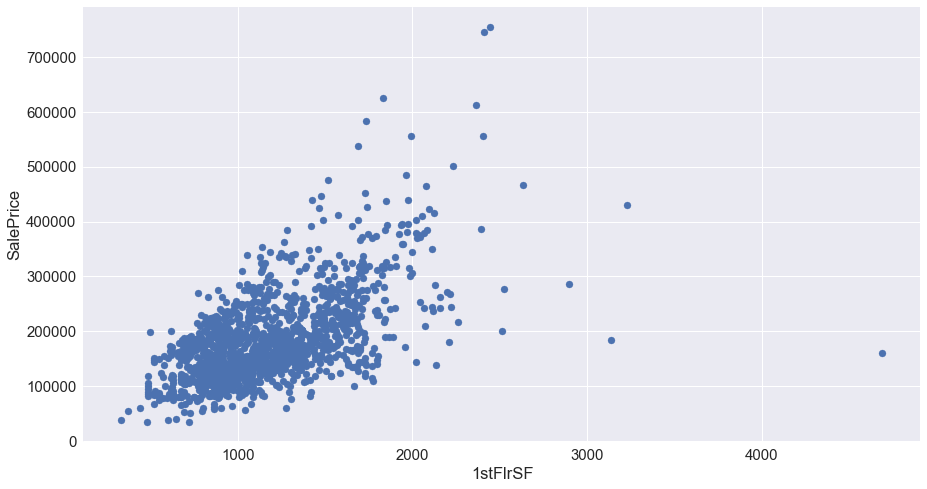

In [500]:
plt.figure(figsize=(15,8))
plt.scatter(train['1stFlrSF'],train['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

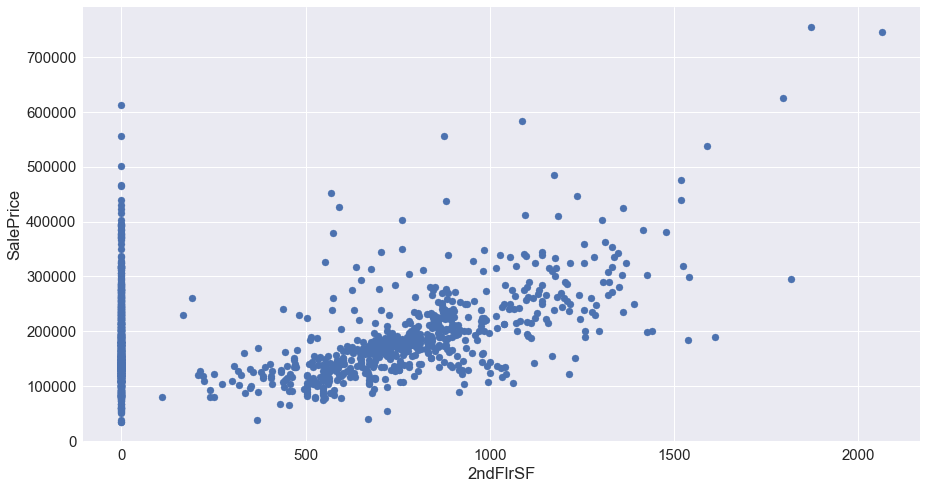

In [501]:
plt.figure(figsize=(15,8))
plt.scatter(train['2ndFlrSF'],train['SalePrice'])
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

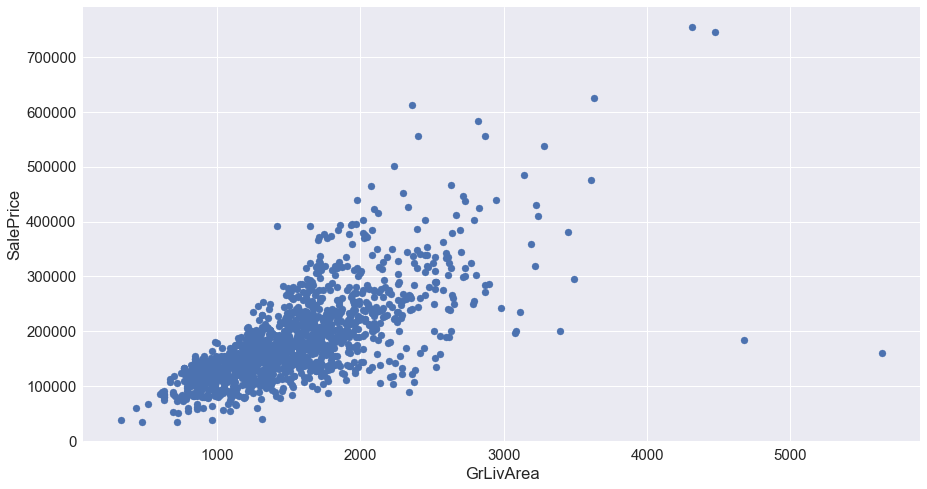

In [502]:
plt.figure(figsize=(15,8))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

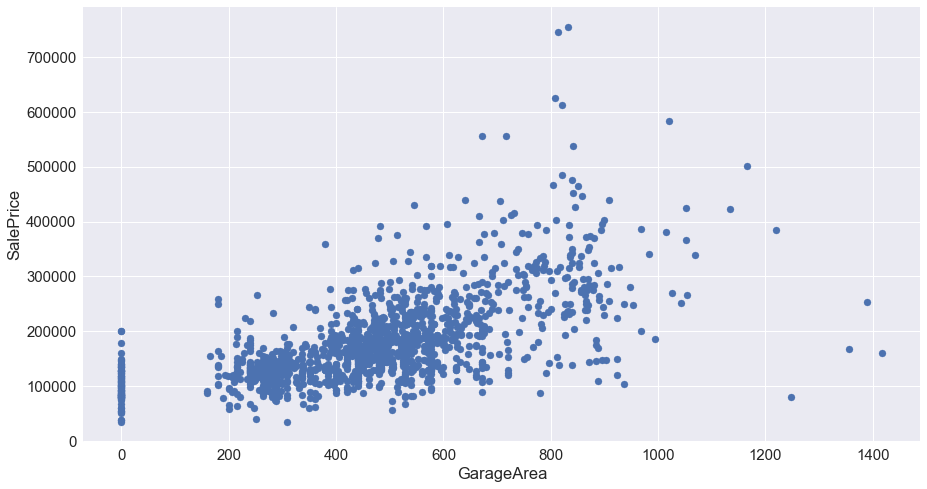

In [504]:
plt.figure(figsize=(15,8))
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

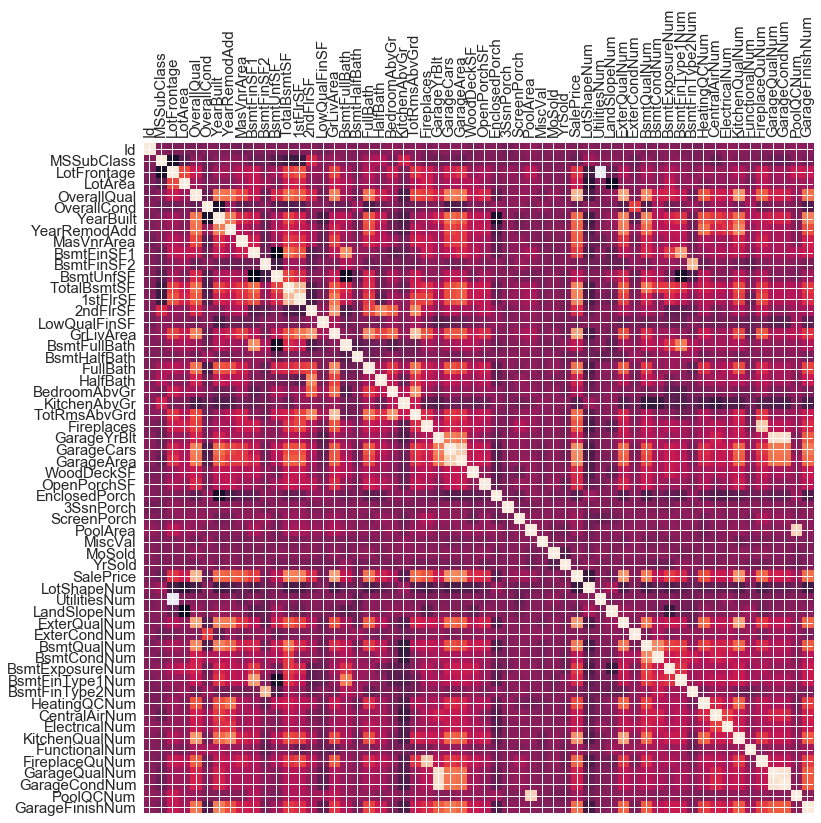

In [948]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(12, 15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [1231]:
train.Alley = train.Alley.fillna("NoAlley")

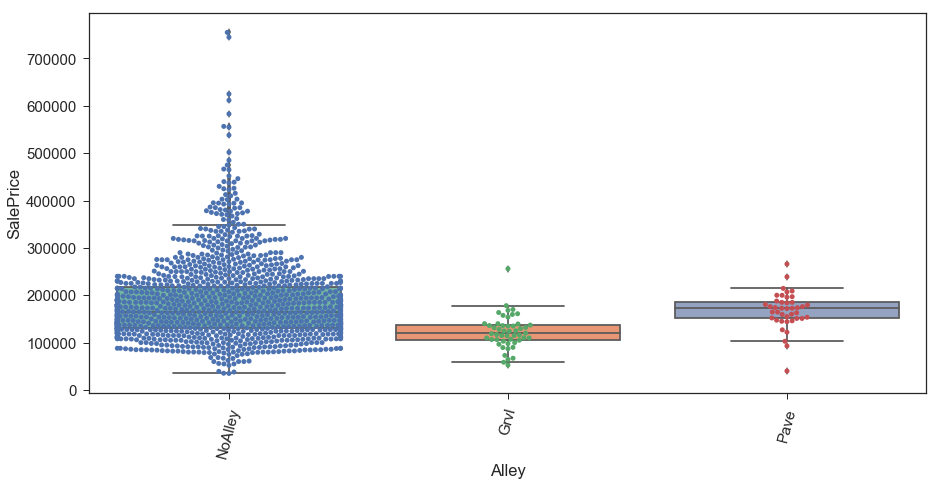

In [663]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.xticks(rotation=75)
sns.set(font_scale =1.5)

sns.boxplot(x='Alley', y='SalePrice', data=train,width = 0.8, palette=sns.color_palette("Set2", 12))
sns.swarmplot(x='Alley', y='SalePrice', data=train)

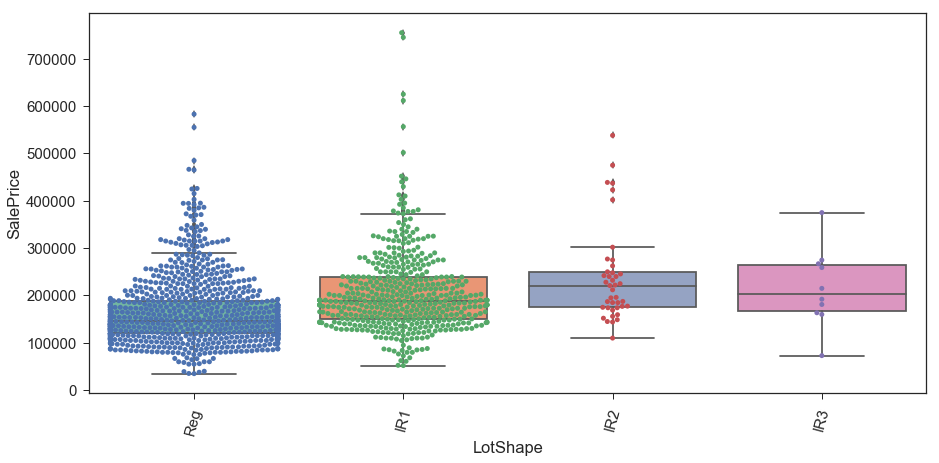

In [423]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LotShape', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LotShape', y='SalePrice', data=train)

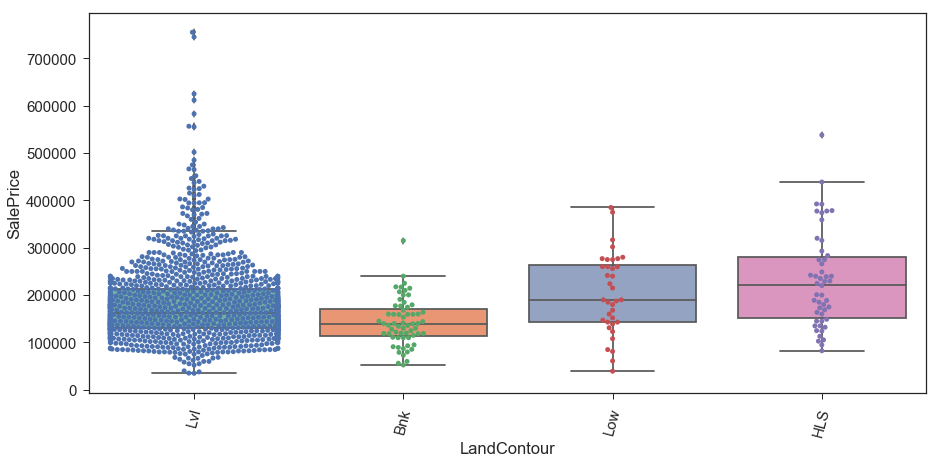

In [424]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LandContour', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LandContour', y='SalePrice', data=train)

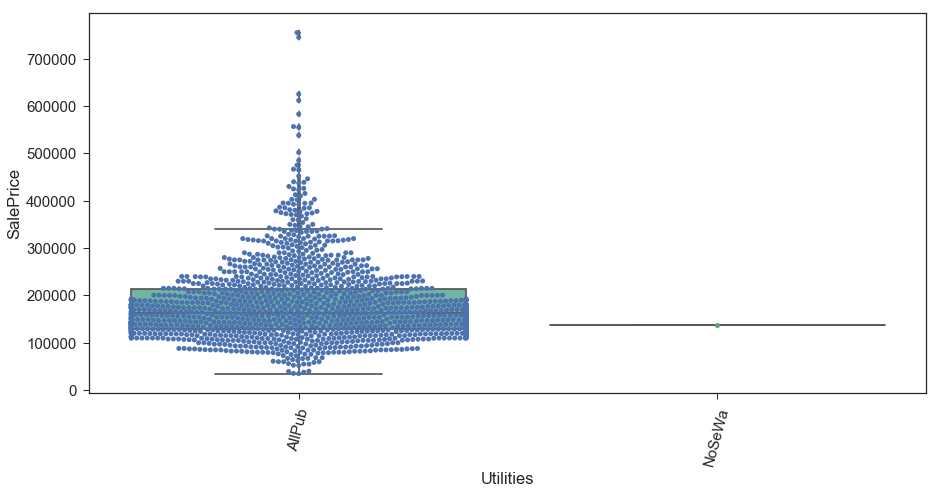

In [425]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Utilities', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='Utilities', y='SalePrice', data=train)

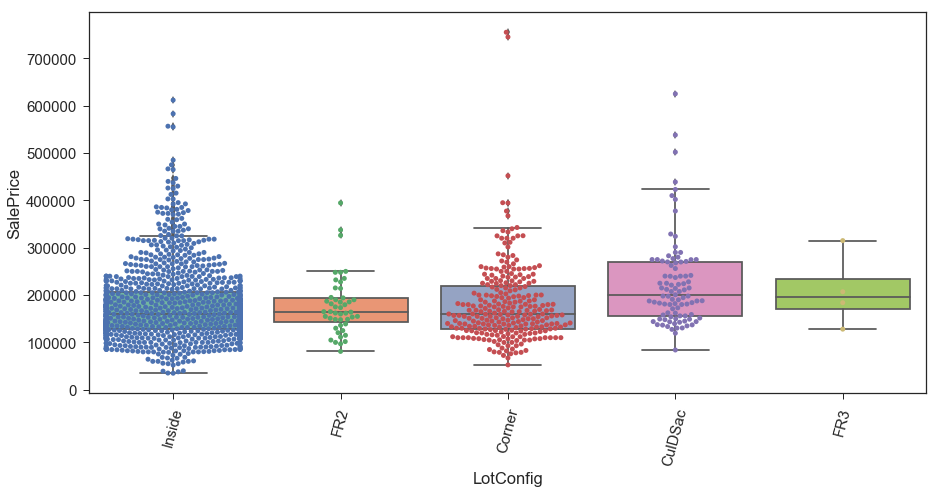

In [426]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LotConfig', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LotConfig', y='SalePrice', data=train)

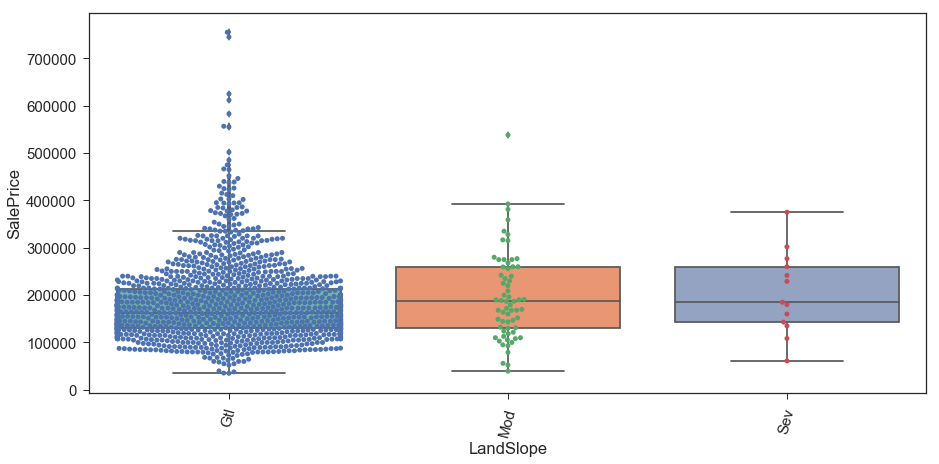

In [427]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='LandSlope', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='LandSlope', y='SalePrice', data=train)

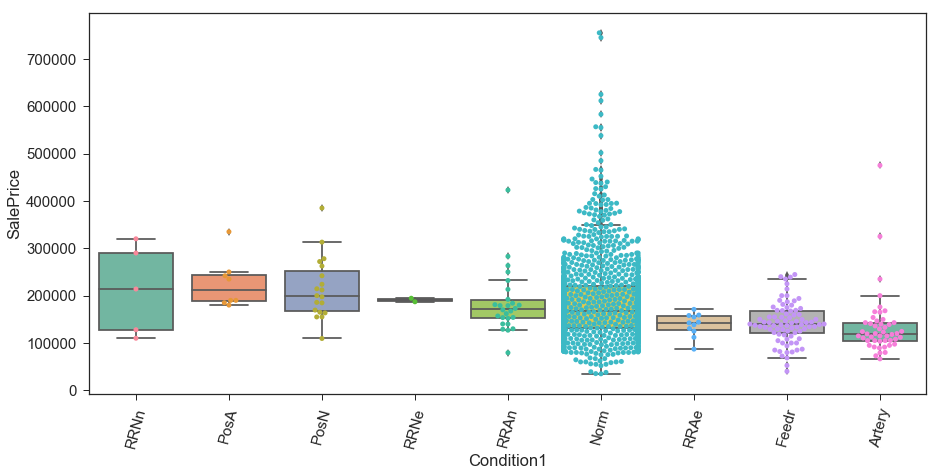

In [444]:
condition1_grp = train.groupby(['Condition1']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Condition1', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=condition1_grp.index)
sns.swarmplot(x='Condition1', y='SalePrice', data=train,order=condition1_grp.index)

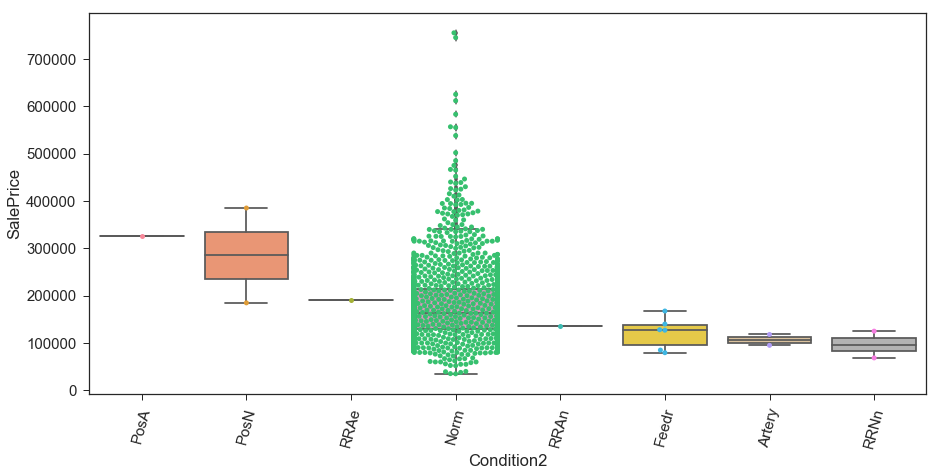

In [443]:
condition2_grp = train.groupby(['Condition2']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Condition2', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=condition2_grp.index)
sns.swarmplot(x='Condition2', y='SalePrice', data=train,order=condition2_grp.index)

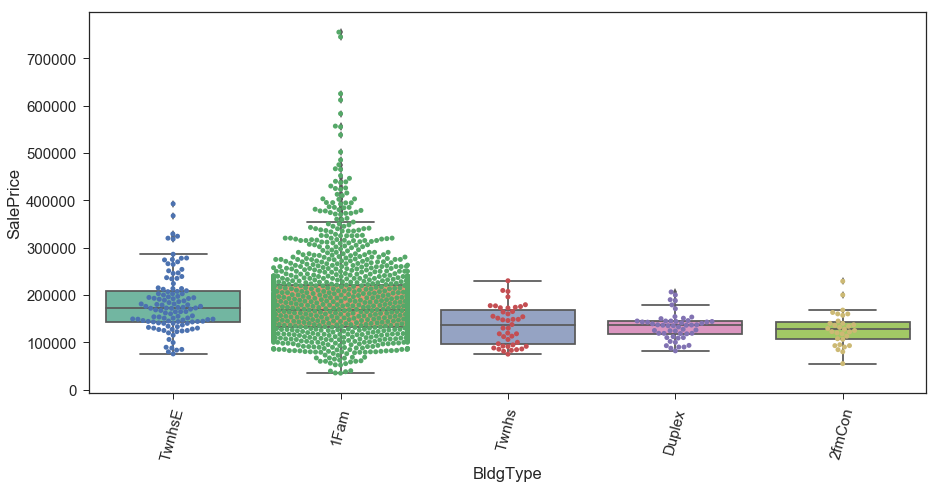

In [442]:
BldgType_grp = train.groupby(['BldgType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='BldgType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=BldgType_grp.index)
sns.swarmplot(x='BldgType', y='SalePrice', data=train, order=BldgType_grp.index)

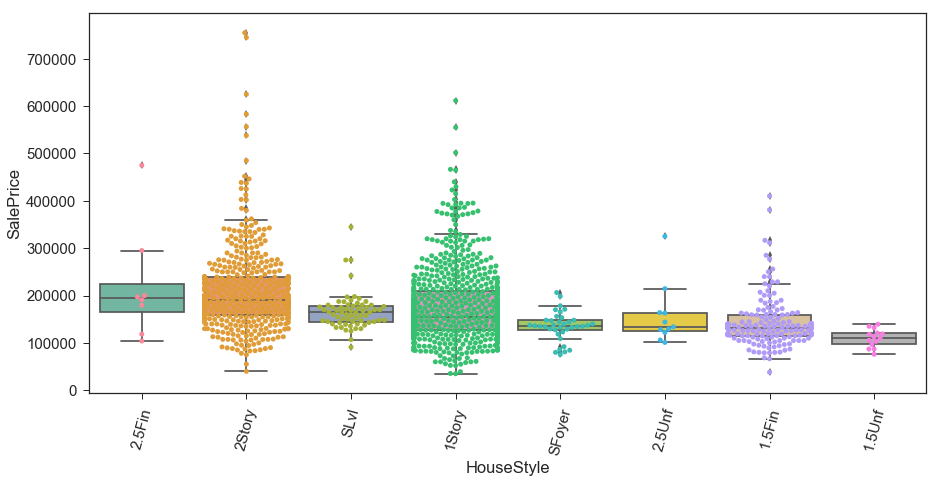

In [448]:
HouseStyle_grp = train.groupby(['HouseStyle']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='HouseStyle', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=HouseStyle_grp.index)
sns.swarmplot(x='HouseStyle', y='SalePrice', data=train, order=HouseStyle_grp.index)

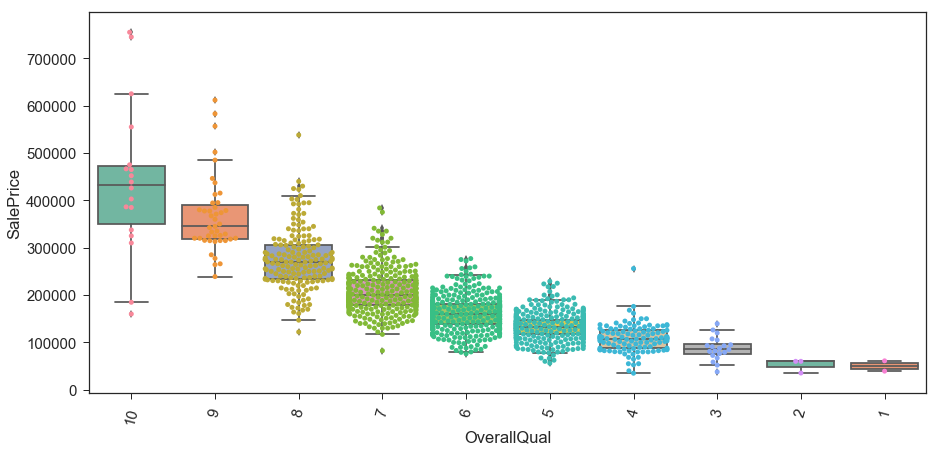

In [449]:
OverallQual_grp = train.groupby(['OverallQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='OverallQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=OverallQual_grp.index)
sns.swarmplot(x='OverallQual', y='SalePrice', data=train, order=OverallQual_grp.index)

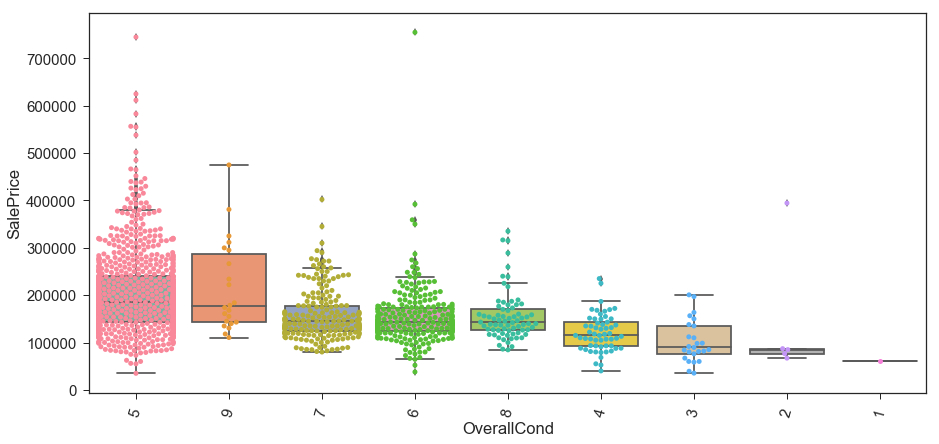

In [450]:
OverallCond_grp = train.groupby(['OverallCond']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='OverallCond', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12),order=OverallCond_grp.index)
sns.swarmplot(x='OverallCond', y='SalePrice', data=train, order=OverallCond_grp.index)

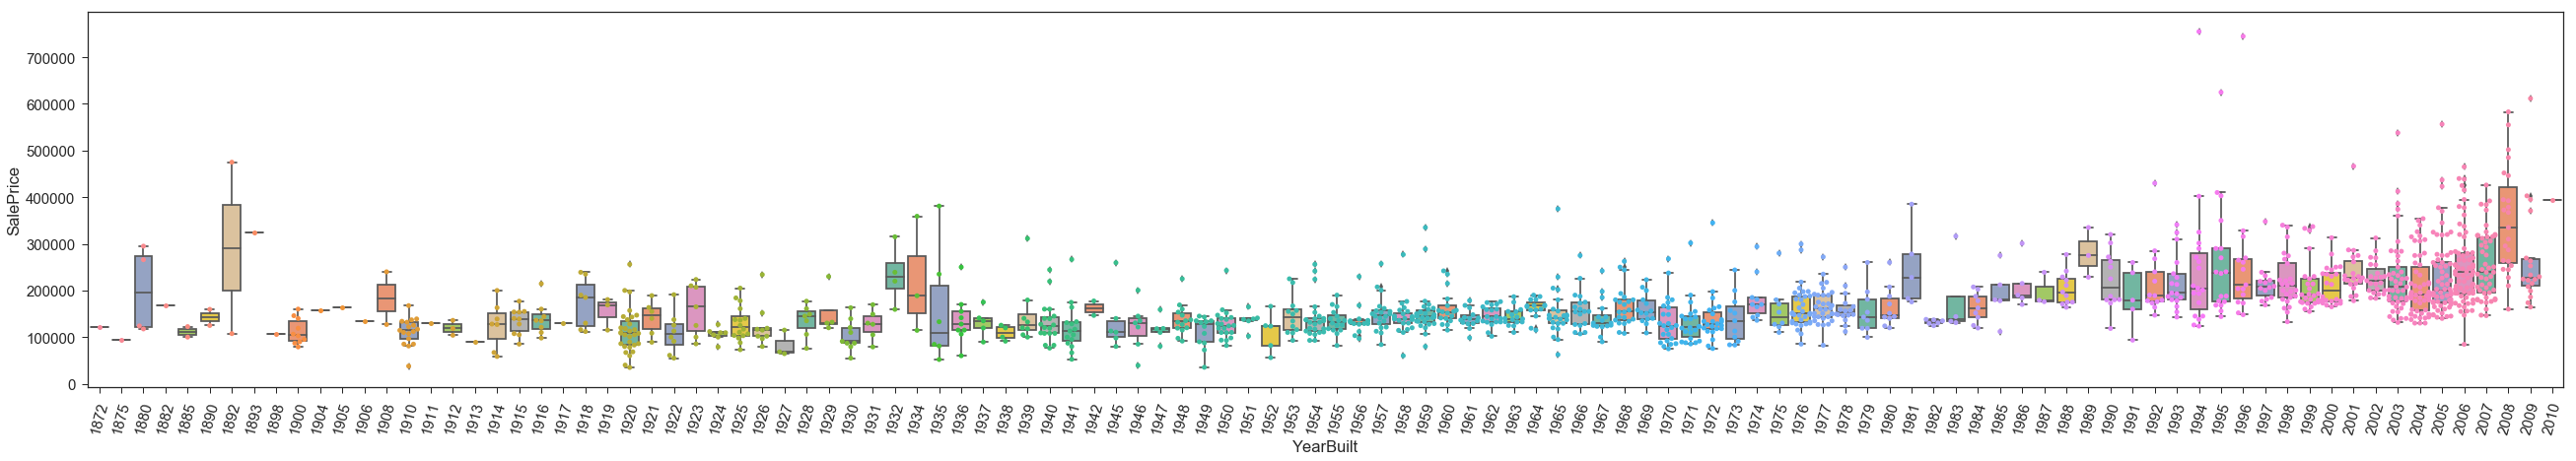

In [459]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(45,7)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='YearBuilt', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12))
sns.swarmplot(x='YearBuilt', y='SalePrice', data=train)

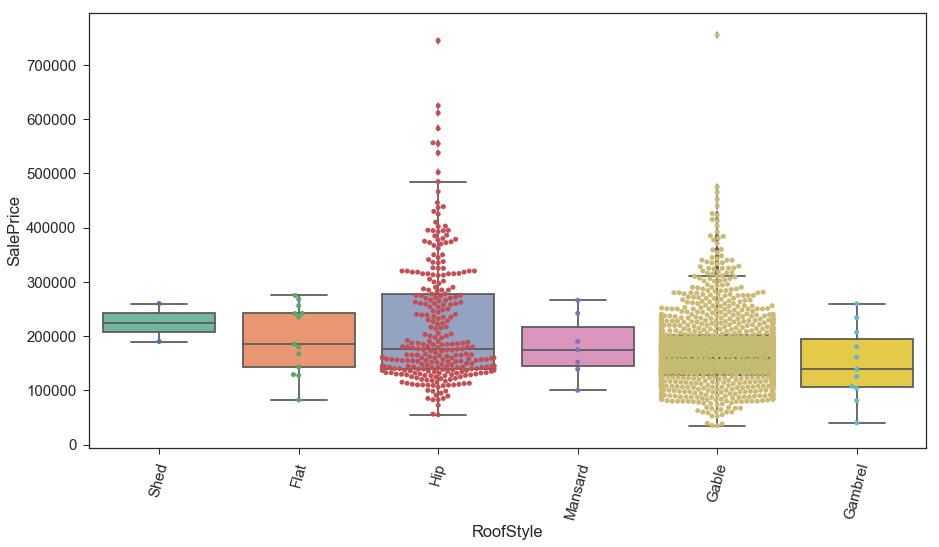

In [460]:
RoofStyle_grp = train.groupby(['RoofStyle']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='RoofStyle', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = RoofStyle_grp.index)
sns.swarmplot(x='RoofStyle', y='SalePrice', data=train, order = RoofStyle_grp.index)

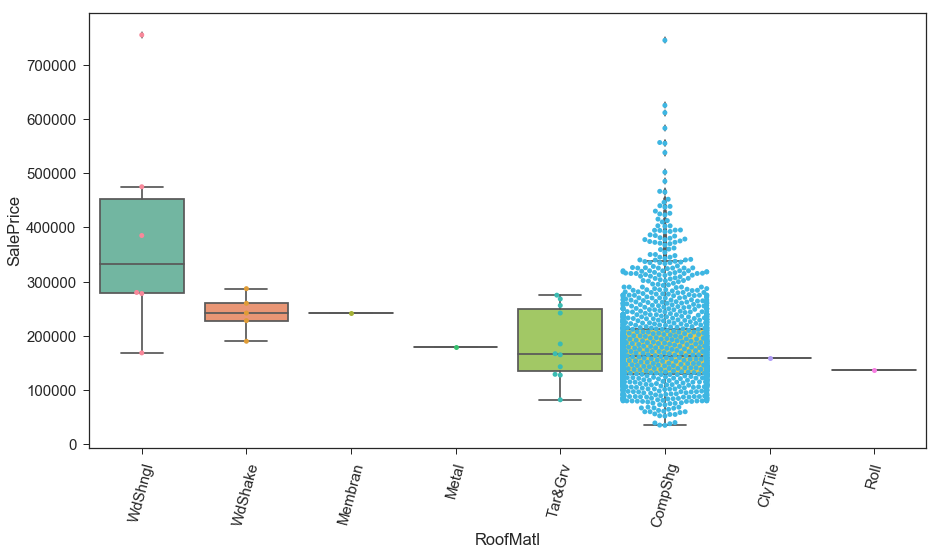

In [461]:
RoofMatl_grp = train.groupby(['RoofMatl']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='RoofMatl', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = RoofMatl_grp.index)
sns.swarmplot(x='RoofMatl', y='SalePrice', data=train, order = RoofMatl_grp.index)

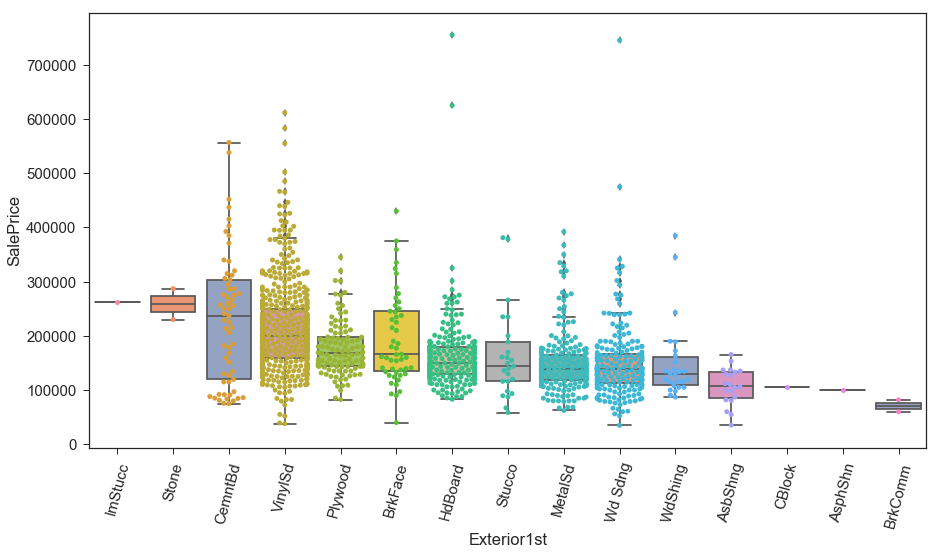

In [462]:
Exterior1st_grp = train.groupby(['Exterior1st']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Exterior1st', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Exterior1st_grp.index)
sns.swarmplot(x='Exterior1st', y='SalePrice', data=train, order = Exterior1st_grp.index)

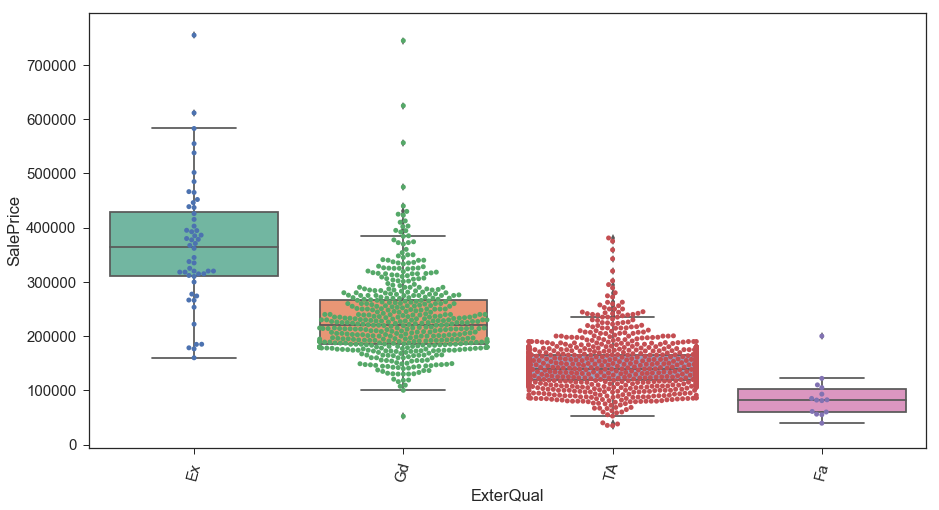

In [463]:
ExterQual_grp = train.groupby(['ExterQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='ExterQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = ExterQual_grp.index)
sns.swarmplot(x='ExterQual', y='SalePrice', data=train, order = ExterQual_grp.index)

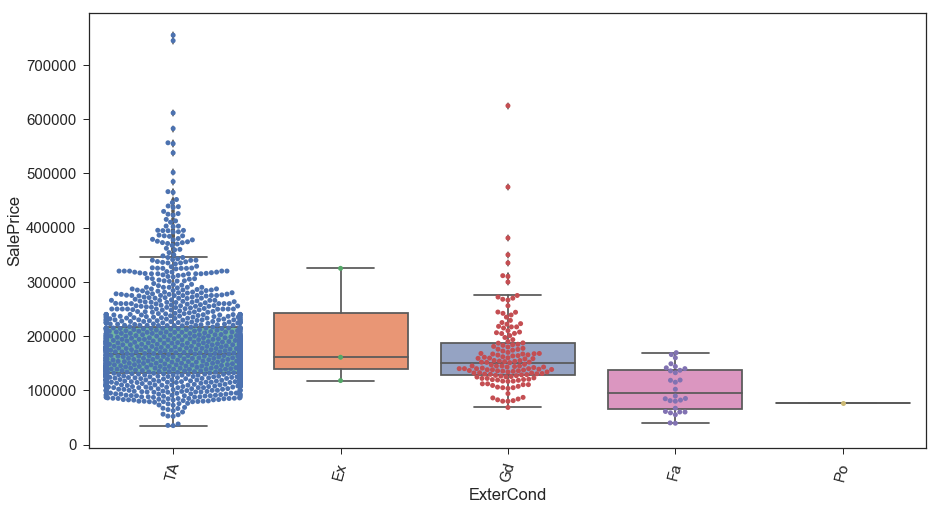

In [464]:
ExterCond_grp = train.groupby(['ExterCond']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='ExterCond', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = ExterCond_grp.index)
sns.swarmplot(x='ExterCond', y='SalePrice', data=train, order = ExterCond_grp.index)

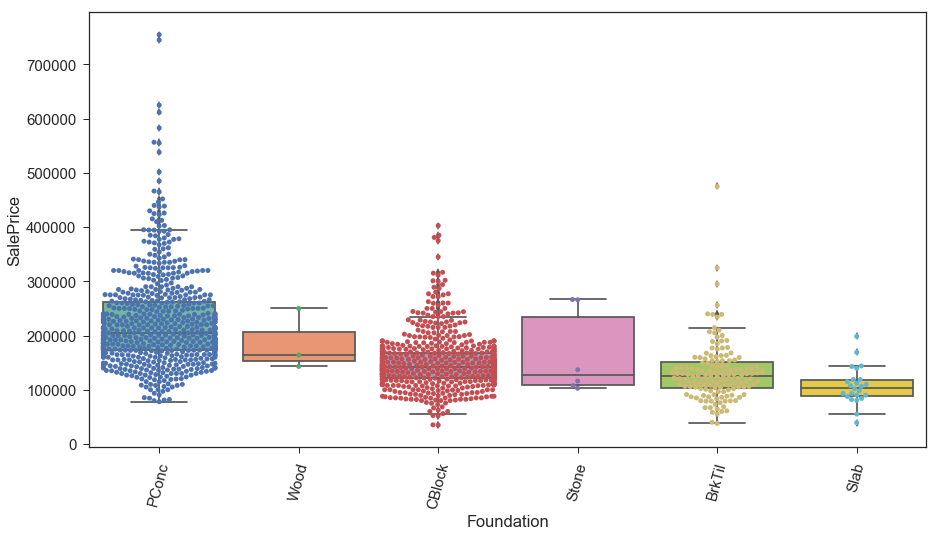

In [465]:
Foundation_grp = train.groupby(['Foundation']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Foundation', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Foundation_grp.index)
sns.swarmplot(x='Foundation', y='SalePrice', data=train, order = Foundation_grp.index)

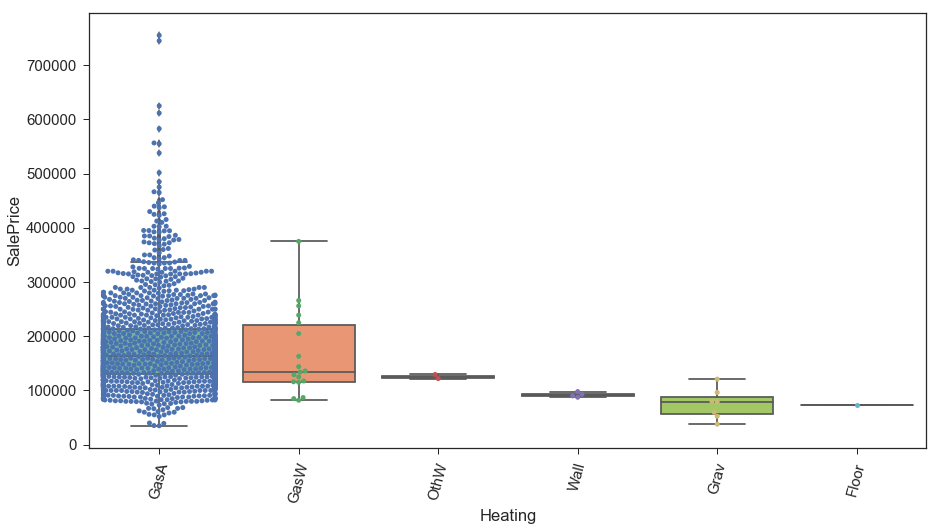

In [466]:
Heating_grp = train.groupby(['Heating']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Heating', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Heating_grp.index)
sns.swarmplot(x='Heating', y='SalePrice', data=train, order = Heating_grp.index)

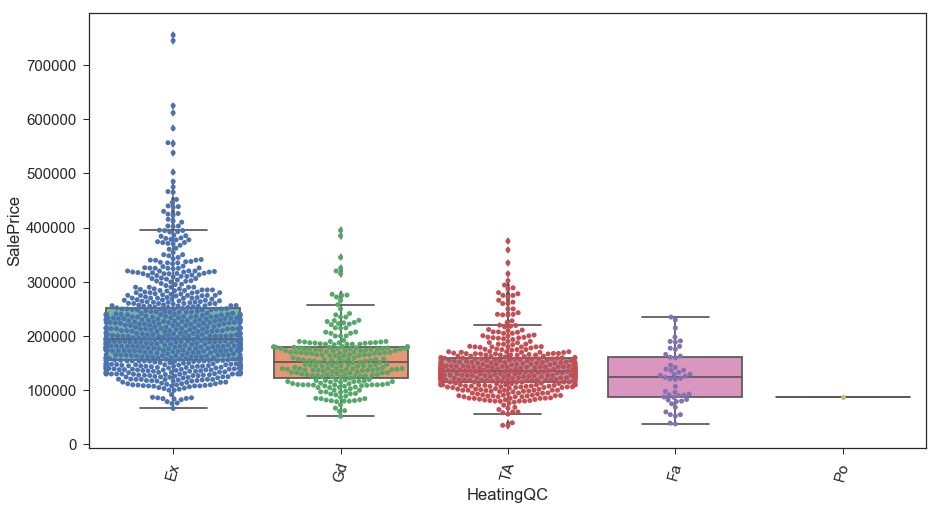

In [467]:
HeatingQC_grp = train.groupby(['HeatingQC']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='HeatingQC', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = HeatingQC_grp.index)
sns.swarmplot(x='HeatingQC', y='SalePrice', data=train, order = HeatingQC_grp.index)

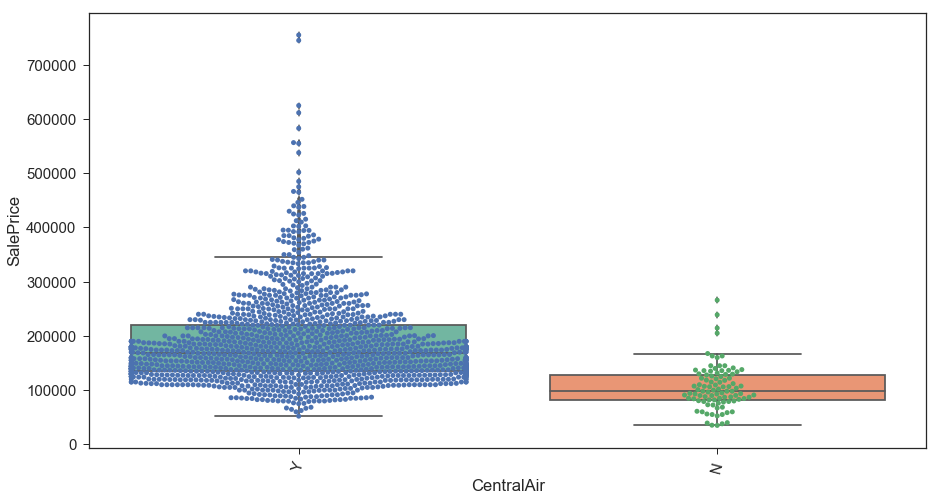

In [468]:
CentralAir_grp = train.groupby(['CentralAir']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='CentralAir', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = CentralAir_grp.index)
sns.swarmplot(x='CentralAir', y='SalePrice', data=train, order = CentralAir_grp.index)

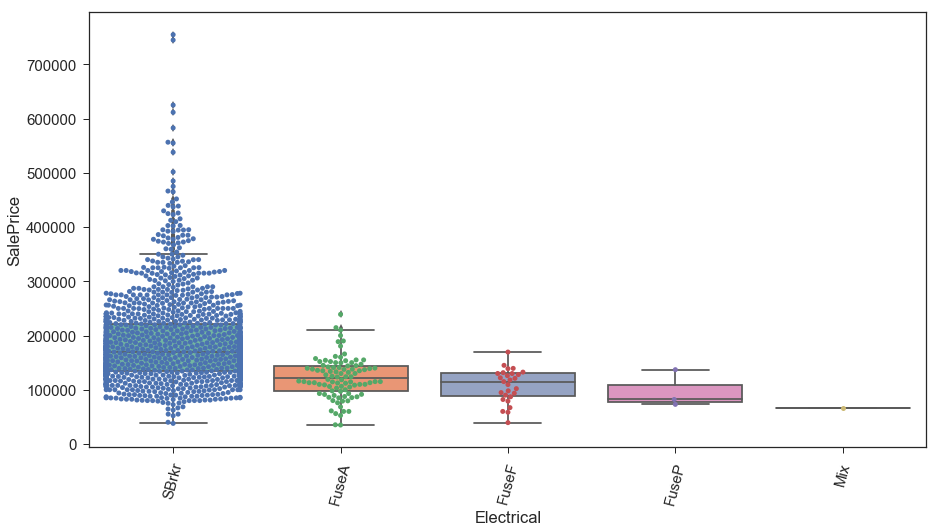

In [469]:
Electrical_grp = train.groupby(['Electrical']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Electrical', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Electrical_grp.index)
sns.swarmplot(x='Electrical', y='SalePrice', data=train, order = Electrical_grp.index)

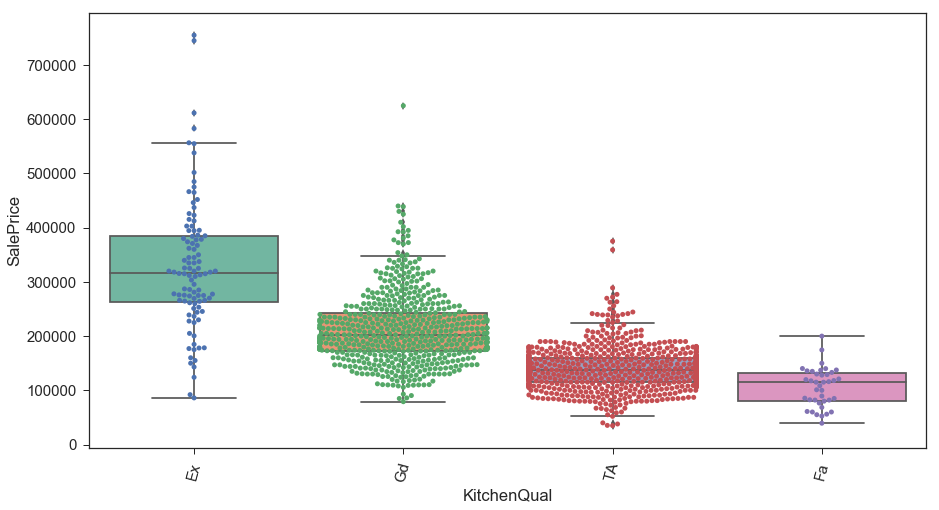

In [470]:
KitchenQual_grp = train.groupby(['KitchenQual']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='KitchenQual', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = KitchenQual_grp.index)
sns.swarmplot(x='KitchenQual', y='SalePrice', data=train, order = KitchenQual_grp.index)

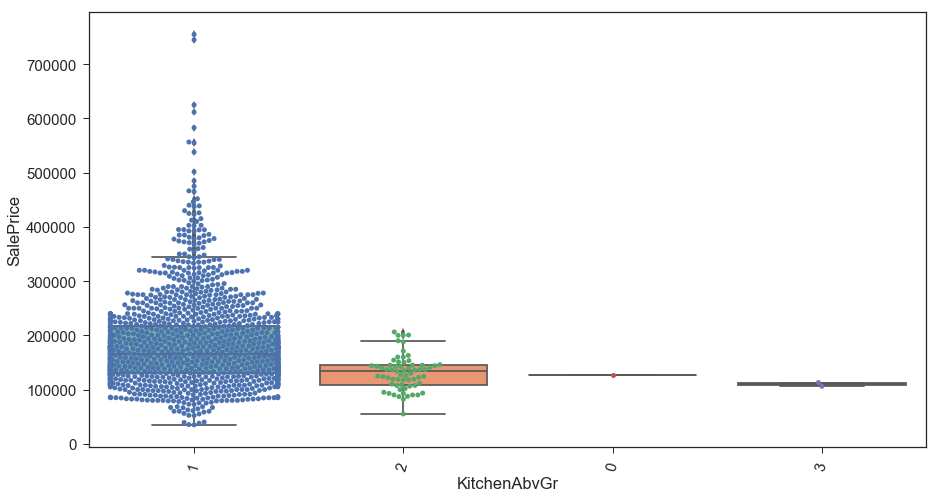

In [472]:
Kitchen_grp = train.groupby(['KitchenAbvGr']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Kitchen_grp.index)
sns.swarmplot(x='KitchenAbvGr', y='SalePrice', data=train, order = Kitchen_grp.index)

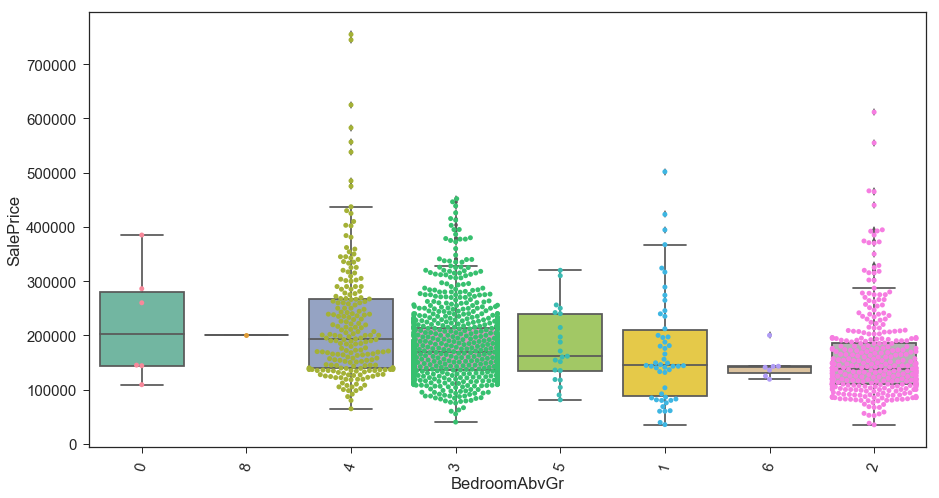

In [474]:
Bedroom_grp = train.groupby(['BedroomAbvGr']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Bedroom_grp.index)
sns.swarmplot(x='BedroomAbvGr', y='SalePrice', data=train, order = Bedroom_grp.index)

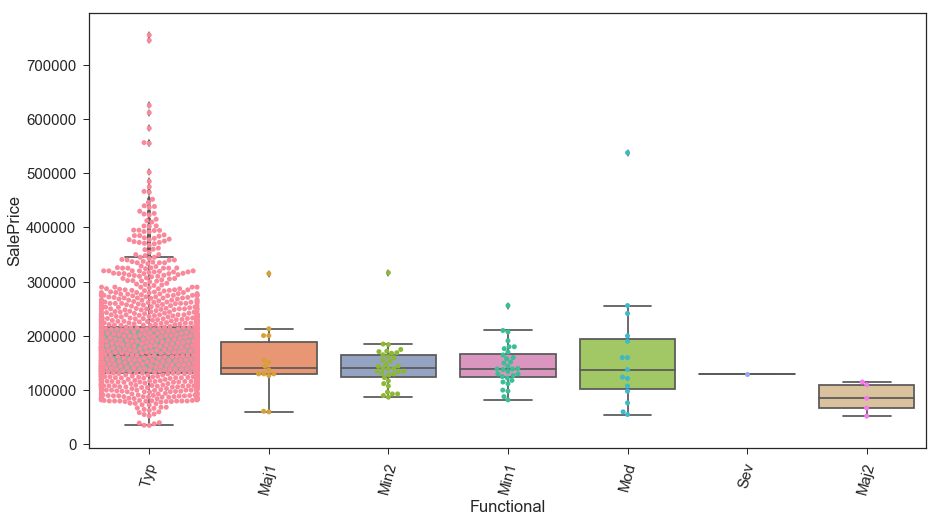

In [475]:
Functional_grp = train.groupby(['Functional']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Functional', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Functional_grp.index)
sns.swarmplot(x='Functional', y='SalePrice', data=train, order = Functional_grp.index)

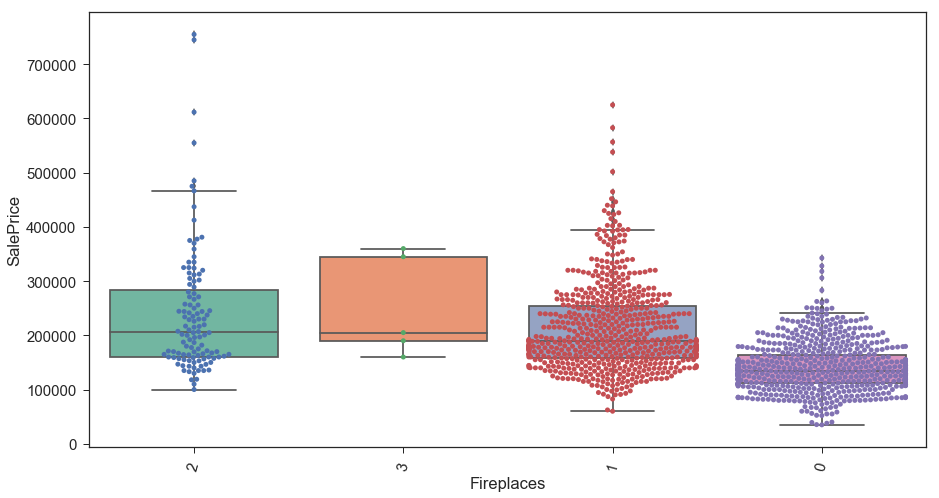

In [476]:
Fireplaces_grp = train.groupby(['Fireplaces']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Fireplaces', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Fireplaces_grp.index)
sns.swarmplot(x='Fireplaces', y='SalePrice', data=train, order = Fireplaces_grp.index)

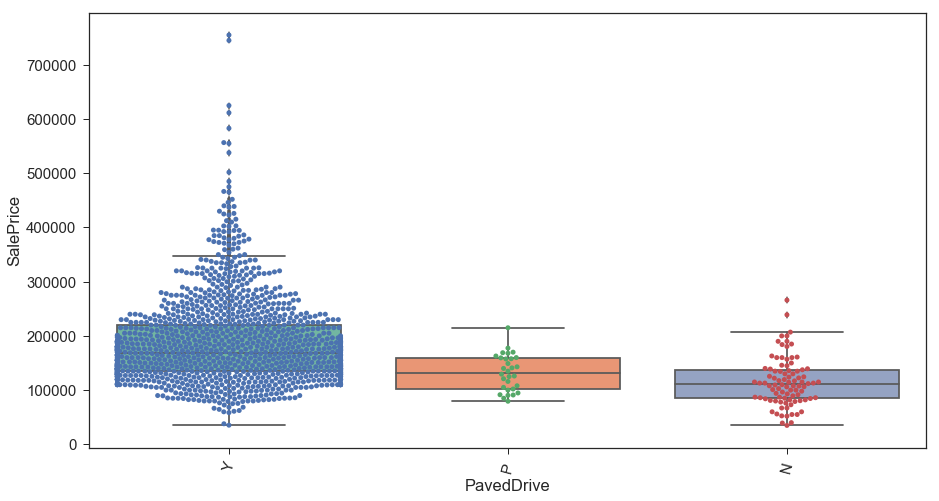

In [479]:
PavedDrive_grp = train.groupby(['PavedDrive']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='PavedDrive', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = PavedDrive_grp.index)
sns.swarmplot(x='PavedDrive', y='SalePrice', data=train, order = PavedDrive_grp.index)

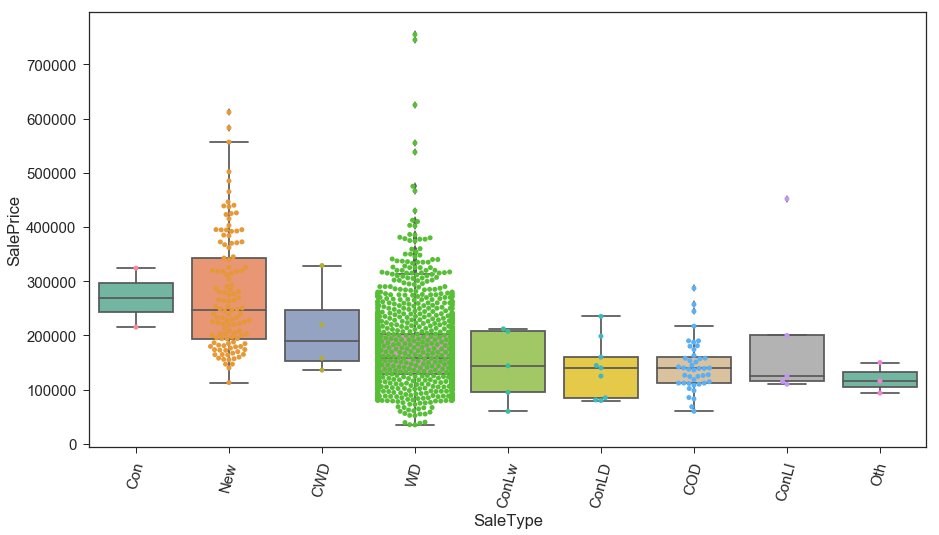

In [493]:
SaleType_grp = train.groupby(['SaleType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='SaleType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = SaleType_grp.index)
sns.swarmplot(x='SaleType', y='SalePrice', data=train, order = SaleType_grp.index)

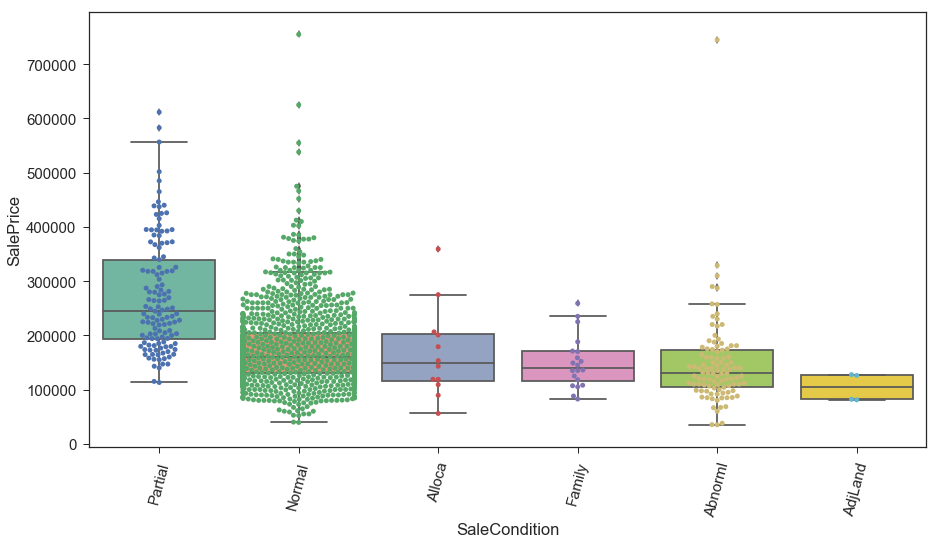

In [494]:
SaleCondition_grp = train.groupby(['SaleCondition']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='SaleCondition', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = SaleCondition_grp.index)
sns.swarmplot(x='SaleCondition', y='SalePrice', data=train, order = SaleCondition_grp.index)

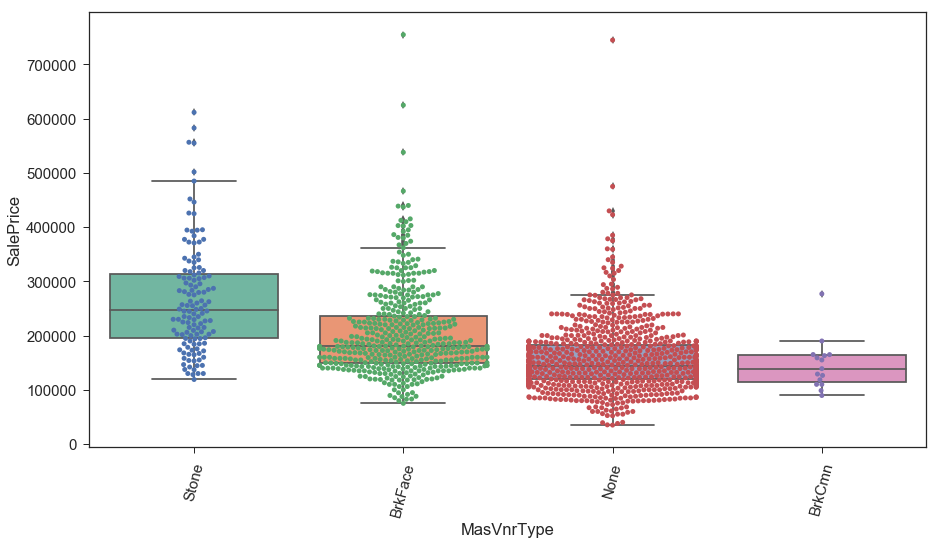

In [498]:
#with 8 missing values as is
MasVnrType_grp = train.groupby(['MasVnrType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='MasVnrType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = MasVnrType_grp.index)
sns.swarmplot(x='MasVnrType', y='SalePrice', data=train, order = MasVnrType_grp.index)

In [1232]:
train.BsmtQual = train.BsmtQual.fillna("NoBasement")

In [1233]:
train.BsmtCond = train.BsmtCond.fillna("NoBasement")

In [1234]:
train.BsmtFinType1 = train.BsmtFinType1.fillna("NoBasement")

In [1235]:
train.FireplaceQu = train.FireplaceQu.fillna("NoFireplace")

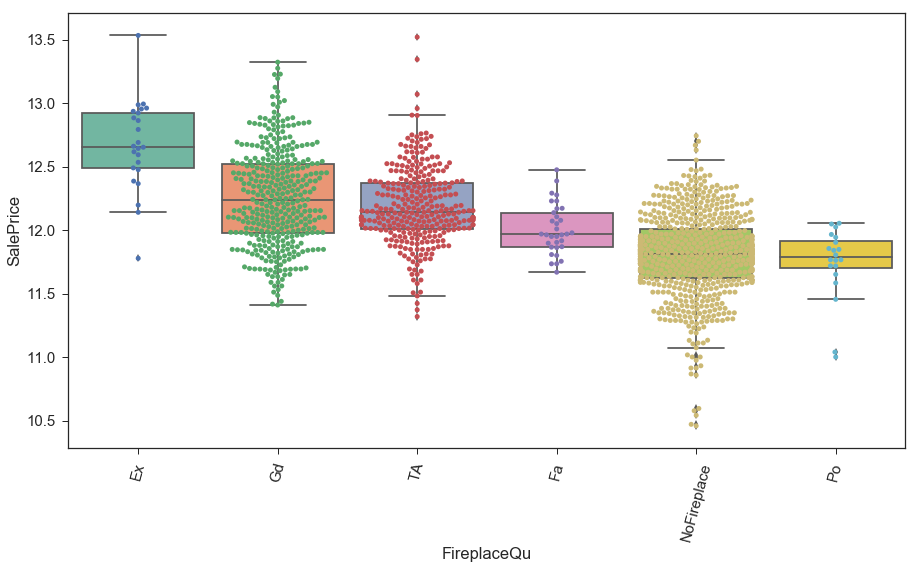

In [1236]:
FireplaceQu_grp = train.groupby(['FireplaceQu']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='FireplaceQu', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = FireplaceQu_grp.index)
sns.swarmplot(x='FireplaceQu', y='SalePrice', data=train, order = FireplaceQu_grp.index)

In [1237]:
train.GarageType = train.GarageType.fillna("NoGarage")

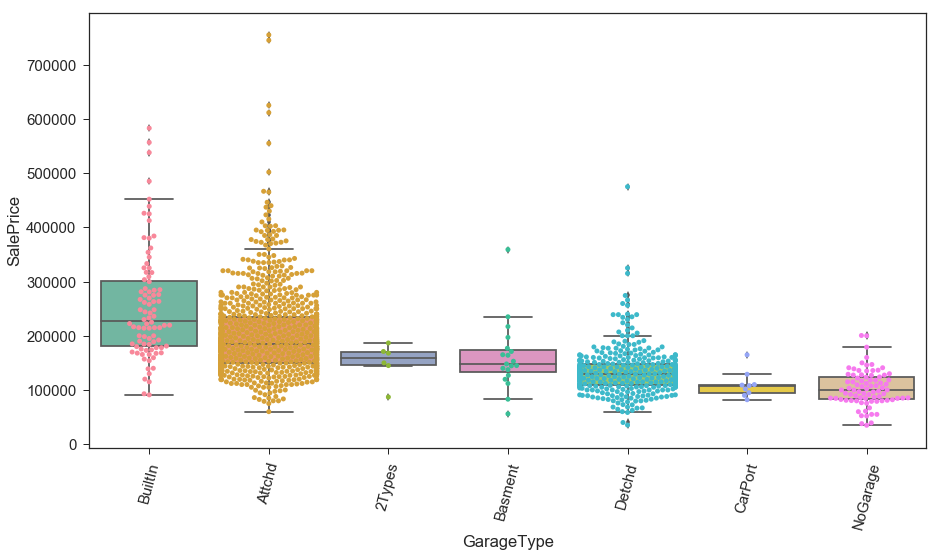

In [486]:
GarageType_grp = train.groupby(['GarageType']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='GarageType', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = GarageType_grp.index)
sns.swarmplot(x='GarageType', y='SalePrice', data=train, order = GarageType_grp.index)

In [1238]:
train.GarageYrBlt = train.GarageYrBlt.fillna(0) #replace with median

In [1240]:
train.GarageFinish = train.GarageFinish.fillna("NoGarage")

In [1241]:
train.GarageQual = train.GarageQual.fillna("NoGarage")

In [1242]:
train.GarageCond = train.GarageCond.fillna("NoGarage")

In [1243]:
train.PoolQC = train.PoolQC.fillna("NoPool")

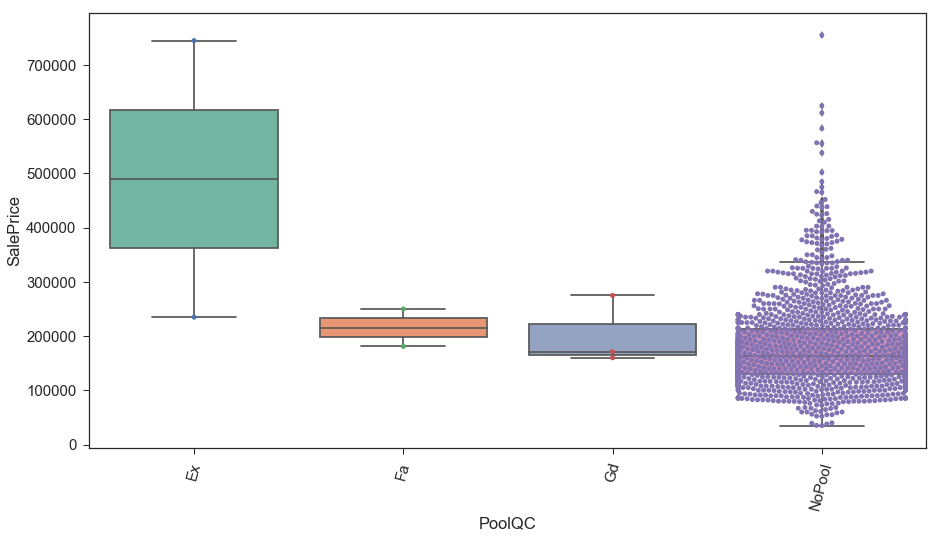

In [514]:
PoolQC_grp = train.groupby(['PoolQC']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='PoolQC', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = PoolQC_grp.index)
sns.swarmplot(x='PoolQC', y='SalePrice', data=train, order = PoolQC_grp.index)

In [1244]:
train.Fence = train.Fence.fillna("NoFence")

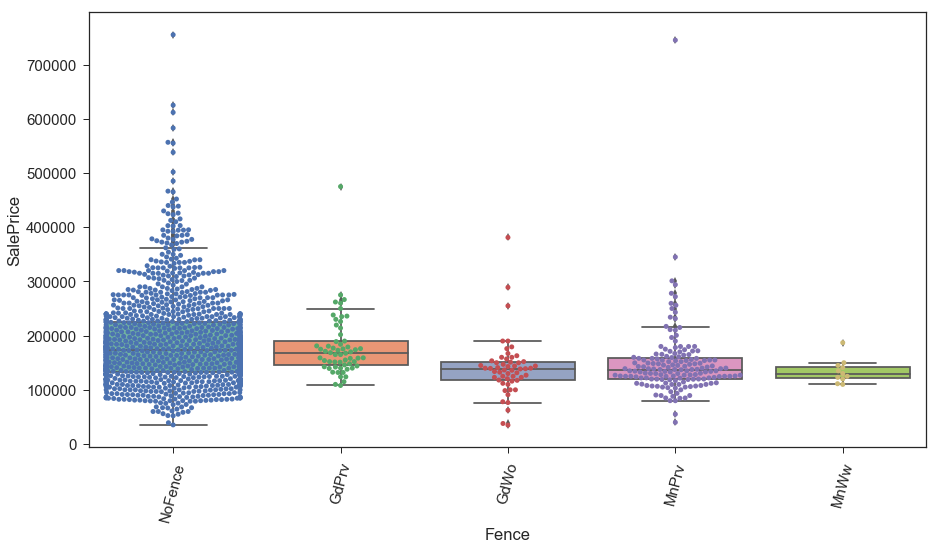

In [516]:
Fence_grp = train.groupby(['Fence']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='Fence', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = Fence_grp.index)
sns.swarmplot(x='Fence', y='SalePrice', data=train, order = Fence_grp.index)

In [1245]:
train.MiscFeature = train.MiscFeature.fillna("NoMisc")

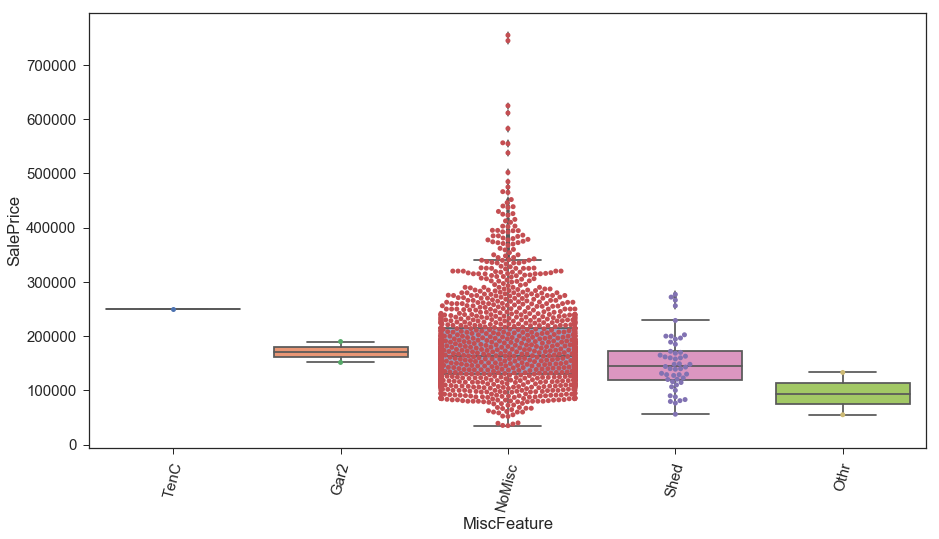

In [676]:
MiscFeature_grp = train.groupby(['MiscFeature']).agg(['median'])['SalePrice'].sort_values('median',ascending=False)

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
plt.xticks(rotation=75)
sns.set(font_scale=1.5)

sns.boxplot(x='MiscFeature', y='SalePrice', data=train,width=0.8,palette=sns.color_palette("Set2",12), order = MiscFeature_grp.index)
sns.swarmplot(x='MiscFeature', y='SalePrice', data=train, order = MiscFeature_grp.index)

In [723]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlley   
1        2          20       RL         80.0     9600   Pave  NoAlley   
2        3          60       RL         68.0    11250   Pave  NoAlley   
3        4          70       RL         60.0     9550   Pave  NoAlley   
4        5          60       RL         84.0    14260   Pave  NoAlley   
5        6          50       RL         85.0    14115   Pave  NoAlley   
6        7          20       RL         75.0    10084   Pave  NoAlley   
7        8          60       RL          NaN    10382   Pave  NoAlley   
8        9          50       RM         51.0     6120   Pave  NoAlley   
9       10         190       RL         50.0     7420   Pave  NoAlley   
10      11          20       RL         70.0    11200   Pave  NoAlley   
11      12          60       RL         85.0    11924   Pave  NoAlley   
12      13          20       RL          NaN    12968   Pave  NoAlley   
13      14          20       RL         91.0    10652   Pave  NoAlley   
14      15          20       RL          NaN    10920   Pave  NoAlley   
15      16          45       RM         51.0     6120   Pave  NoAlley   
16      17          20       RL          NaN    11241   Pave  NoAlley   
17      18          90       RL         72.0    10791   Pave  NoAlley   
18      19          20       RL         66.0    13695   Pave  NoAlley   
19      20          20       RL         70.0     7560   Pave  NoAlley   
20      21          60       RL        101.0    14215   Pave  NoAlley   
21      22          45       RM         57.0     7449   Pave     Grvl   
22      23          20       RL         75.0     9742   Pave  NoAlley   
23      24         120       RM         44.0     4224   Pave  NoAlley   
24      25          20       RL          NaN     8246   Pave  NoAlley   
25      26          20       RL        110.0    14230   Pave  NoAlley   
26      27          20       RL         60.0     7200   Pave  NoAlley   
27      28          20       RL         98.0    11478   Pave  NoAlley   
28      29          20       RL         47.0    16321   Pave  NoAlley   
29      30          30       RM         60.0     6324   Pave  NoAlley   
...    ...         ...      ...          ...      ...    ...      ...   
1430  1431          60       RL         60.0    21930   Pave  NoAlley   
1431  1432         120       RL          NaN     4928   Pave  NoAlley   
1432  1433          30       RL         60.0    10800   Pave     Grvl   
1433  1434          60       RL         93.0    10261   Pave  NoAlley   
1434  1435          20       RL         80.0    17400   Pave  NoAlley   
1435  1436          20       RL         80.0     8400   Pave  NoAlley   
1436  1437          20       RL         60.0     9000   Pave  NoAlley   
1437  1438          20       RL         96.0    12444   Pave  NoAlley   
1438  1439          20       RM         90.0     7407   Pave  NoAlley   
1439  1440          60       RL         80.0    11584   Pave  NoAlley   
1440  1441          70       RL         79.0    11526   Pave  NoAlley   
1441  1442         120       RM          NaN     4426   Pave  NoAlley   
1442  1443          60       FV         85.0    11003   Pave  NoAlley   
1443  1444          30       RL          NaN     8854   Pave  NoAlley   
1444  1445          20       RL         63.0     8500   Pave  NoAlley   
1445  1446          85       RL         70.0     8400   Pave  NoAlley   
1446  1447          20       RL          NaN    26142   Pave  NoAlley   
1447  1448          60       RL         80.0    10000   Pave  NoAlley   
1448  1449          50       RL         70.0    11767   Pave  NoAlley   
1449  1450         180       RM         21.0     1533   Pave  NoAlley   
1450  1451          90       RL         60.0     9000   Pave  NoAlley   
1451  1452          20       RL         78.0     9262   Pave  NoAlley   
1452  1453         180       RM         35.0     3675   Pave  NoAl

In [1246]:
train.loc[train.Id == 949,'BsmtExposure'] = "No" #based on eyeballing

In [1247]:
train.loc[train.Id == 333,'BsmtFinType2'] = "Rec" #based on eyeballing

In [1248]:
train.BsmtFinType2 = train.BsmtFinType2.fillna("NoBasement")

In [1249]:
train.BsmtExposure = train.BsmtExposure.fillna("NoBasement")

In [1250]:
train.Electrical = train.Electrical.fillna("SBrkr") #based on eyeballing

In [1251]:
train.MasVnrType = train.MasVnrType.fillna("None") #as both MasVnrType and MasVnrArea are missing

In [1252]:
train.MasVnrArea = train.MasVnrArea.fillna(0) #as both MasVnrType and MasVnrArea are missing

In [1253]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [1254]:
lot_shape = ["IR3","IR2","IR1","Reg"]
cat_values = [0,1,2,3]
for i in range(0,4):
    train.loc[train['LotShape']==lot_shape[i] ,'LotShapeNum']= cat_values[i]

In [1255]:
utilities = ["NoSeWa","AllPub"]
cat_values = [0,1]
for i in range(0,2):
    train.loc[train['Utilities']==utilities[i] ,'UtilitiesNum']= cat_values[i]

In [1256]:
train["LandSlopeNum"]=train['LandSlope'].replace(['Sev','Mod','Gtl'],[0,1,2])

In [1257]:
train["ExterQualNum"]=train['ExterQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [1258]:
train["ExterCondNum"]=train['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [1259]:
train["BsmtQualNum"]=train['BsmtQual'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [1260]:
train["BsmtCondNum"]=train['BsmtCond'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [1261]:
train["BsmtExposureNum"]=train['BsmtExposure'].replace(['NoBasement','No','Mn','Av','Gd'],[0,1,2,3,4])

In [1262]:
train["BsmtFinType1Num"]=train['BsmtFinType1'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [1263]:
train["BsmtFinType2Num"]=train['BsmtFinType2'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [1264]:
train["HeatingQCNum"]=train['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [1265]:
train["CentralAirNum"]=train['CentralAir'].replace(['N','Y'],[0,1])

In [1266]:
train["ElectricalNum"]=train['Electrical'].replace(['FuseP','FuseF','FuseA','Mix','SBrkr'],[0,1,2,3,4])

In [1267]:
train["KitchenQualNum"]=train['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [1268]:
train["FunctionalNum"]=train['Functional'].replace(['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,1,2,3,4,5,6,7])

In [1269]:
train["FireplaceQuNum"]=train['FireplaceQu'].replace(['NoFireplace','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [1270]:
train["GarageQualNum"]=train['GarageQual'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [1271]:
train["GarageCondNum"]=train['GarageCond'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [1272]:
train["PoolQCNum"]=train['PoolQC'].replace(['NoPool','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [1273]:
train["GarageFinishNum"]=train['GarageFinish'].replace(['NoGarage','Unf','RFn','Fin'],[0,1,2,3])

In [1281]:
#creating a df for normalzing features
train_normalized = train.copy()

In [1282]:
numeric_feats = train_normalized.dtypes[train_normalized.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_normalized[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
MiscVal          24.451640
PoolQCNum        16.834252
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
BsmtFinType2Num   3.287344
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
LotFrontage       2.160866
TotalSF           1.774874
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
ExterCondNum      1.395783
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtExposureNum   1.104465
BsmtUnfSF         0.919323
ExterQualNum      0.825140
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
KitchenQualNum    0.386368
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121222
GarageFinishNum   0.119744
FireplaceQuNum    0.112654
YrSold            0.096170
FullBath          0.036524
Id                0.000000
BsmtFinType1Num  -0.159013
GarageCars       -0.342197
YearRemodAdd     -0.503044
HeatingQCNum     -0.539902
YearBuilt        -0.612831
BsmtQualNum      -1.286247
LotShapeNum      -1.308639
GarageQualNum    -3.225265
ElectricalNum    -3.288653
GarageCondNum    -3.328476
CentralAirNum    -3.526757
BsmtCondNum      -3.697230
GarageYrBlt      -3.865524
LandSlopeNum     -4.808735
FunctionalNum    -4.907166
UtilitiesNum    -38.170678

In [1220]:
skewness.to_csv('skewness.csv')

In [1283]:
#categorical ordinal variables:
skewness = skewness[skewness.index !='PoolQCNum']
skewness = skewness[skewness.index !='BsmtFinType2Num']
skewness = skewness[skewness.index !='ExterCondNum']
skewness = skewness[skewness.index !='BsmtExposureNum']
skewness = skewness[skewness.index !='ExterQualNum']
skewness = skewness[skewness.index !='OverallCond']
skewness = skewness[skewness.index !='OverallQual']
skewness = skewness[skewness.index !='KitchenQualNum']
skewness = skewness[skewness.index !='GarageFinishNum']
skewness = skewness[skewness.index !='FireplaceQuNum']
skewness = skewness[skewness.index !='BsmtFinType1Num']
skewness = skewness[skewness.index !='HeatingQCNum']
skewness = skewness[skewness.index !='BsmtQualNum']
skewness = skewness[skewness.index !='LotShapeNum']
skewness = skewness[skewness.index !='GarageQualNum']
skewness = skewness[skewness.index !='ElectricalNum']
skewness = skewness[skewness.index !='GarageCondNum']
skewness = skewness[skewness.index !='CentralAirNum']
skewness = skewness[skewness.index !='BsmtCondNum']
skewness = skewness[skewness.index !='LandSlopeNum']
skewness = skewness[skewness.index !='FunctionalNum']

#omitting this as we know only one row has different value
skewness = skewness[skewness.index !='UtilitiesNum']

#non-numeric variables
skewness = skewness[skewness.index !='MSSubClass'] #as MSSubClass is not a number actually
# skewness = skewness[skewness.index !='YrSold'] #do transform years
# skewness = skewness[skewness.index !='YearRemodAdd']
# skewness = skewness[skewness.index !='YearBuilt']
# skewness = skewness[skewness.index !='GarageYrBlt']
skewness = skewness[skewness.index !='Id']

#lotfrontage omitted since we need to transform it after imputing
skewness = skewness[skewness.index !='LotFrontage']

skewness

Skew
MiscVal        24.451640
PoolArea       14.813135
LotArea        12.195142
3SsnPorch      10.293752
LowQualFinSF    9.002080
KitchenAbvGr    4.483784
BsmtFinSF2      4.250888
ScreenPorch     4.117977
BsmtHalfBath    4.099186
EnclosedPorch   3.086696
MasVnrArea      2.674865
OpenPorchSF     2.361912
TotalSF         1.774874
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
1stFlrSF        1.375342
GrLivArea       1.365156
BsmtUnfSF       0.919323
2ndFlrSF        0.812194
TotRmsAbvGrd    0.675646
HalfBath        0.675203
Fireplaces      0.648898
BsmtFullBath    0.595454
MoSold          0.211835
BedroomAbvGr    0.211572
GarageArea      0.179796
SalePrice       0.121222
YrSold          0.096170
FullBath        0.036524
GarageCars     -0.342197
YearRemodAdd   -0.503044
YearBuilt      -0.612831
GarageYrBlt    -3.865524

In [1284]:
skewness = skewness[(skewness) > 0.75] #generally 0.75 or 0.8 used as cutoff
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

skewed_features = skewness.index
skewed_features

#check_logvalues = []
#check_logvalues=pd.DataFrame(check_logvalues)

for feat in skewed_features:
       train_normalized[feat] = np.log1p(train_normalized[feat])
        
train_normalized

There are 34 skewed numerical features to log transform


Id  MSSubClass MSZoning  LotFrontage    LotArea Street    Alley  \
0        1          60       RL         65.0   9.042040   Pave  NoAlley   
1        2          20       RL         80.0   9.169623   Pave  NoAlley   
2        3          60       RL         68.0   9.328212   Pave  NoAlley   
3        4          70       RL         60.0   9.164401   Pave  NoAlley   
4        5          60       RL         84.0   9.565284   Pave  NoAlley   
5        6          50       RL         85.0   9.555064   Pave  NoAlley   
6        7          20       RL         75.0   9.218804   Pave  NoAlley   
7        8          60       RL          NaN   9.247925   Pave  NoAlley   
8        9          50       RM         51.0   8.719481   Pave  NoAlley   
9       10         190       RL         50.0   8.912069   Pave  NoAlley   
10      11          20       RL         70.0   9.323758   Pave  NoAlley   
11      12          60       RL         85.0   9.386392   Pave  NoAlley   
12      13          20       RL          NaN   9.470317   Pave  NoAlley   
13      14          20       RL         91.0   9.273597   Pave  NoAlley   
14      15          20       RL          NaN   9.298443   Pave  NoAlley   
15      16          45       RM         51.0   8.719481   Pave  NoAlley   
16      17          20       RL          NaN   9.327412   Pave  NoAlley   
17      18          90       RL         72.0   9.286560   Pave  NoAlley   
18      19          20       RL         66.0   9.524859   Pave  NoAlley   
19      20          20       RL         70.0   8.930759   Pave  NoAlley   
20      21          60       RL        101.0   9.562123   Pave  NoAlley   
21      22          45       RM         57.0   8.915969   Pave     Grvl   
22      23          20       RL         75.0   9.184304   Pave  NoAlley   
23      24         120       RM         44.0   8.348775   Pave  NoAlley   
24      25          20       RL          NaN   9.017605   Pave  NoAlley   
25      26          20       RL        110.0   9.563178   Pave  NoAlley   
26      27          20       RL         60.0   8.881975   Pave  NoAlley   
27      28          20       RL         98.0   9.348275   Pave  NoAlley   
28      29          20       RL         47.0   9.700269   Pave  NoAlley   
29      30          30       RM         60.0   8.752265   Pave  NoAlley   
...    ...         ...      ...          ...        ...    ...      ...   
1430  1431          60       RL         60.0   9.995656   Pave  NoAlley   
1431  1432         120       RL          NaN   8.502891   Pave  NoAlley   
1432  1433          30       RL         60.0   9.287394   Pave     Grvl   
1433  1434          60       RL         93.0   9.236203   Pave  NoAlley   
1434  1435          20       RL         80.0   9.764283   Pave  NoAlley   
1435  1436          20       RL         80.0   9.036106   Pave  NoAlley   
1436  1437          20       RL         60.0   9.105091   Pave  NoAlley   
1437  1438          20       RL         96.0   9.429074   Pave  NoAlley   
1438  1439          20       RM         90.0   8.910316   Pave  NoAlley   
1439  1440          60       RL         80.0   9.357466   Pave  NoAlley   
1440  1441          70       RL         79.0   9.352447   Pave  NoAlley   
1441  1442         120       RM          NaN   8.395477   Pave  NoAlley   
1442  1443          60       FV         85.0   9.306014   Pave  NoAlley   
1443  1444          30       RL          NaN   9.088738   Pave  NoAlley   
1444  1445          20       RL         63.0   9.047939   Pave  NoAlley   
1445  1446          85       RL         70.0   9.036106   Pave  NoAlley   
1446  1447          20       RL          NaN  10.171337   Pave  NoAlley   
1447  1448          60       RL         80.0   9.210440   Pave  NoAlley   
1448  1449          50       RL         70.0   9.373139   Pave  NoAlley   
1449  1450         180       RM         21.0   7.335634   Pave  NoAlley   
1450  1451          90       RL         60.0   9.105091   Pave  NoAlley   
1451  1452          20       RL  

In [953]:
list(train)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [1285]:
np.sum(train.isnull())

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage        259
LotArea              0
Street               0
Alley                0
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
                  ... 
PoolQC               0
Fence                0
MiscFeature          0
MiscVal              0
MoSold               0
YrSold               0
SaleType             0
SaleCondition        0
SalePrice            0
TotalSF              0
LotShapeNum          0
UtilitiesNum         0
LandSlopeNu

In [1287]:
train_normalized_dummies = train_normalized.copy()

In [1288]:
# not using MsnVnrType for now to dummify as it has NAs
train_normalized_dummies = pd.get_dummies(train_normalized_dummies, prefix=None, prefix_sep='_', dummy_na=False, columns=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','MasVnrType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'], sparse=False, drop_first=True)

In [1289]:
train.shape

(1460, 102)

In [1290]:
train_normalized_dummies

Id  LotFrontage    LotArea LotShape Utilities LandSlope  OverallQual  \
0        1         65.0   9.042040      Reg    AllPub       Gtl            7   
1        2         80.0   9.169623      Reg    AllPub       Gtl            6   
2        3         68.0   9.328212      IR1    AllPub       Gtl            7   
3        4         60.0   9.164401      IR1    AllPub       Gtl            7   
4        5         84.0   9.565284      IR1    AllPub       Gtl            8   
5        6         85.0   9.555064      IR1    AllPub       Gtl            5   
6        7         75.0   9.218804      Reg    AllPub       Gtl            8   
7        8          NaN   9.247925      IR1    AllPub       Gtl            7   
8        9         51.0   8.719481      Reg    AllPub       Gtl            7   
9       10         50.0   8.912069      Reg    AllPub       Gtl            5   
10      11         70.0   9.323758      Reg    AllPub       Gtl            5   
11      12         85.0   9.386392      IR1    AllPub       Gtl            9   
12      13          NaN   9.470317      IR2    AllPub       Gtl            5   
13      14         91.0   9.273597      IR1    AllPub       Gtl            7   
14      15          NaN   9.298443      IR1    AllPub       Gtl            6   
15      16         51.0   8.719481      Reg    AllPub       Gtl            7   
16      17          NaN   9.327412      IR1    AllPub       Gtl            6   
17      18         72.0   9.286560      Reg    AllPub       Gtl            4   
18      19         66.0   9.524859      Reg    AllPub       Gtl            5   
19      20         70.0   8.930759      Reg    AllPub       Gtl            5   
20      21        101.0   9.562123      IR1    AllPub       Gtl            8   
21      22         57.0   8.915969      Reg    AllPub       Gtl            7   
22      23         75.0   9.184304      Reg    AllPub       Gtl            8   
23      24         44.0   8.348775      Reg    AllPub       Gtl            5   
24      25          NaN   9.017605      IR1    AllPub       Gtl            5   
25      26        110.0   9.563178      Reg    AllPub       Gtl            8   
26      27         60.0   8.881975      Reg    AllPub       Gtl            5   
27      28         98.0   9.348275      Reg    AllPub       Gtl            8   
28      29         47.0   9.700269      IR1    AllPub       Gtl            5   
29      30         60.0   8.752265      IR1    AllPub       Gtl            4   
...    ...          ...        ...      ...       ...       ...          ...   
1430  1431         60.0   9.995656      IR3    AllPub       Gtl            5   
1431  1432          NaN   8.502891      IR1    AllPub       Gtl            6   
1432  1433         60.0   9.287394      Reg    AllPub       Gtl            4   
1433  1434         93.0   9.236203      IR1    AllPub       Gtl            6   
1434  1435         80.0   9.764283      Reg    AllPub       Mod            5   
1435  1436         80.0   9.036106      Reg    AllPub       Gtl            6   
1436  1437         60.0   9.105091      Reg    AllPub       Gtl            4   
1437  1438         96.0   9.429074      Reg    AllPub       Gtl            8   
1438  1439         90.0   8.910316      Reg    AllPub       Gtl            6   
1439  1440         80.0   9.357466      Reg    AllPub       Gtl            7   
1440  1441         79.0   9.352447      IR1    AllPub       Mod            6   
1441  1442          NaN   8.395477      Reg    AllPub       Gtl            6   
1442  1443         85.0   9.306014      Reg    AllPub       Gtl           10   
1443  1444          NaN   9.088738      Reg    AllPub       Gtl            6   
1444  1445         63.0   9.047939      Reg    AllPub       Gtl            7   
1445  1446         70.0   9.036106      Reg    AllPub       Gtl            6   
1446  1447          NaN  10.171337      IR1    AllPub       Gtl            5   
1447  1448         80.0   9.210440      Reg    AllPub       Gtl            8   
1448  14

In [1291]:
test_knn_LotFrontage = train_normalized_dummies[train_normalized_dummies.LotFrontage.isna()]
test_knn_LotFrontage

Id  LotFrontage    LotArea LotShape Utilities LandSlope  OverallQual  \
7        8          NaN   9.247925      IR1    AllPub       Gtl            7   
12      13          NaN   9.470317      IR2    AllPub       Gtl            5   
14      15          NaN   9.298443      IR1    AllPub       Gtl            6   
16      17          NaN   9.327412      IR1    AllPub       Gtl            6   
24      25          NaN   9.017605      IR1    AllPub       Gtl            5   
31      32          NaN   9.053102      IR1    AllPub       Gtl            5   
42      43          NaN   9.124891      IR1    AllPub       Gtl            5   
43      44          NaN   9.127067      IR1    AllPub       Gtl            5   
50      51          NaN   9.537484      IR2    AllPub       Gtl            6   
64      65          NaN   9.145909      Reg    AllPub       Gtl            7   
66      67          NaN   9.898525      Reg    AllPub       Gtl            7   
76      77          NaN   9.044994      IR1    AllPub       Gtl            4   
84      85          NaN   9.051462      IR1    AllPub       Gtl            7   
95      96          NaN   9.186662      IR2    AllPub       Gtl            6   
100    101          NaN   9.268987      IR1    AllPub       Gtl            6   
104    105          NaN   8.956609      Reg    AllPub       Gtl            7   
111    112          NaN   8.955577      IR1    AllPub       Gtl            7   
113    114          NaN   9.952325      Reg    AllPub       Gtl            6   
116    117          NaN   9.360225      Reg    AllPub       Gtl            5   
120    121          NaN   9.973666      IR1    AllPub       Sev            6   
126    127          NaN   8.502891      IR1    AllPub       Gtl            6   
131    132          NaN   9.411238      IR1    AllPub       Gtl            6   
133    134          NaN   8.832588      IR1    AllPub       Gtl            8   
136    137          NaN   9.245321      IR1    AllPub       Gtl            5   
147    148          NaN   9.159678      IR1    AllPub       Gtl            7   
149    150          NaN   8.738896      Reg    AllPub       Gtl            5   
152    153          NaN   9.602653      IR1    AllPub       Gtl            6   
153    154          NaN   9.510519      Reg    AllPub       Gtl            6   
160    161          NaN   9.316590      IR1    AllPub       Gtl            6   
166    167          NaN   9.278840      IR1    AllPub       Gtl            5   
...    ...          ...        ...      ...       ...       ...          ...   
1300  1301          NaN   9.283870      IR1    AllPub       Gtl            7   
1301  1302          NaN   8.922792      IR1    AllPub       Gtl            6   
1309  1310          NaN   8.875427      Reg    AllPub       Gtl            6   
1312  1313          NaN   9.166702      IR1    AllPub       Gtl            8   
1318  1319          NaN   9.601166      IR2    AllPub       Gtl            8   
1321  1322          NaN   8.799058      IR1    AllPub       Gtl            3   
1342  1343          NaN   9.145909      Reg    AllPub       Gtl            8   
1346  1347          NaN   9.941843      IR2    AllPub       Gtl            7   
1348  1349          NaN   9.692581      IR3    AllPub       Gtl            7   
1354  1355          NaN   9.241548      IR1    AllPub       Gtl            7   
1356  1357          NaN   9.156729      Reg    AllPub       Gtl            5   
1357  1358          NaN   9.436519      IR1    AllPub       Gtl            5   
1358  1359          NaN   7.658228      Reg    AllPub       Gtl            6   
1362  1363          NaN   9.434603      IR1    AllPub       Gtl            4   
1365  1366          NaN   8.922792      Reg    AllPub       Gtl            7   
1368  1369          NaN   8.397508      Reg    AllPub       Gtl            6   
1373  1374          NaN   9.341456      Reg    AllPub       Gtl           10   
1381  1382          NaN   9.466996      IR1    AllPub       Gtl            6   
1383  13

In [1292]:
train_knn_LotFrontage = train_normalized_dummies[-train_normalized_dummies.LotFrontage.isna()]
train_knn_LotFrontage

Id  LotFrontage   LotArea LotShape Utilities LandSlope  OverallQual  \
0        1         65.0  9.042040      Reg    AllPub       Gtl            7   
1        2         80.0  9.169623      Reg    AllPub       Gtl            6   
2        3         68.0  9.328212      IR1    AllPub       Gtl            7   
3        4         60.0  9.164401      IR1    AllPub       Gtl            7   
4        5         84.0  9.565284      IR1    AllPub       Gtl            8   
5        6         85.0  9.555064      IR1    AllPub       Gtl            5   
6        7         75.0  9.218804      Reg    AllPub       Gtl            8   
8        9         51.0  8.719481      Reg    AllPub       Gtl            7   
9       10         50.0  8.912069      Reg    AllPub       Gtl            5   
10      11         70.0  9.323758      Reg    AllPub       Gtl            5   
11      12         85.0  9.386392      IR1    AllPub       Gtl            9   
13      14         91.0  9.273597      IR1    AllPub       Gtl            7   
15      16         51.0  8.719481      Reg    AllPub       Gtl            7   
17      18         72.0  9.286560      Reg    AllPub       Gtl            4   
18      19         66.0  9.524859      Reg    AllPub       Gtl            5   
19      20         70.0  8.930759      Reg    AllPub       Gtl            5   
20      21        101.0  9.562123      IR1    AllPub       Gtl            8   
21      22         57.0  8.915969      Reg    AllPub       Gtl            7   
22      23         75.0  9.184304      Reg    AllPub       Gtl            8   
23      24         44.0  8.348775      Reg    AllPub       Gtl            5   
25      26        110.0  9.563178      Reg    AllPub       Gtl            8   
26      27         60.0  8.881975      Reg    AllPub       Gtl            5   
27      28         98.0  9.348275      Reg    AllPub       Gtl            8   
28      29         47.0  9.700269      IR1    AllPub       Gtl            5   
29      30         60.0  8.752265      IR1    AllPub       Gtl            4   
30      31         50.0  9.047939      Reg    AllPub       Gtl            4   
32      33         85.0  9.310186      Reg    AllPub       Gtl            8   
33      34         70.0  9.264165      IR1    AllPub       Gtl            5   
34      35         60.0  8.897546      Reg    AllPub       Gtl            9   
35      36        108.0  9.504427      Reg    AllPub       Gtl            8   
...    ...          ...       ...      ...       ...       ...          ...   
1425  1426         80.0  9.280053      IR1    AllPub       Gtl            6   
1426  1427         81.0  9.300638      IR1    AllPub       Gtl            7   
1427  1428         60.0  9.299358      Reg    AllPub       Gtl            5   
1428  1429         60.0  8.881975      Reg    AllPub       Gtl            5   
1430  1431         60.0  9.995656      IR3    AllPub       Gtl            5   
1432  1433         60.0  9.287394      Reg    AllPub       Gtl            4   
1433  1434         93.0  9.236203      IR1    AllPub       Gtl            6   
1434  1435         80.0  9.764283      Reg    AllPub       Mod            5   
1435  1436         80.0  9.036106      Reg    AllPub       Gtl            6   
1436  1437         60.0  9.105091      Reg    AllPub       Gtl            4   
1437  1438         96.0  9.429074      Reg    AllPub       Gtl            8   
1438  1439         90.0  8.910316      Reg    AllPub       Gtl            6   
1439  1440         80.0  9.357466      Reg    AllPub       Gtl            7   
1440  1441         79.0  9.352447      IR1    AllPub       Mod            6   
1442  1443         85.0  9.306014      Reg    AllPub       Gtl           10   
1444  1445         63.0  9.047939      Reg    AllPub       Gtl            7   
1445  1446         70.0  9.036106      Reg    AllPub       Gtl            6   
1447  1448         80.0  9.210440      Reg    AllPub       Gtl            8   
1448  1449         70.0  9.373139      Reg    AllPub      

In [1293]:
y_col_for_knn = ["LotFrontage"]

In [1294]:
train_knn_LotFrontage[y_col_for_knn]

LotFrontage
0            65.0
1            80.0
2            68.0
3            60.0
4            84.0
5            85.0
6            75.0
8            51.0
9            50.0
10           70.0
11           85.0
13           91.0
15           51.0
17           72.0
18           66.0
19           70.0
20          101.0
21           57.0
22           75.0
23           44.0
25          110.0
26           60.0
27           98.0
28           47.0
29           60.0
30           50.0
32           85.0
33           70.0
34           60.0
35          108.0
...           ...
1425         80.0
1426         81.0
1427         60.0
1428         60.0
1430         60.0
1432         60.0
1433         93.0
1434         80.0
1435         80.0
1436         60.0
1437         96.0
1438         90.0
1439         80.0
1440         79.0
1442         85.0
1444         63.0
1445         70.0
1447         80.0
1448         70.0
1449         21.0
1450         60.0
1451         78.0
1452         35.0
1453         90.0
1454         62.0
1455         62.0
1456         85.0
1457         66.0
1458         68.0
1459         75.0

[1201 rows x 1 columns]

In [1295]:
test_knn_LotFrontage[y_col_for_knn]

LotFrontage
7             NaN
12            NaN
14            NaN
16            NaN
24            NaN
31            NaN
42            NaN
43            NaN
50            NaN
64            NaN
66            NaN
76            NaN
84            NaN
95            NaN
100           NaN
104           NaN
111           NaN
113           NaN
116           NaN
120           NaN
126           NaN
131           NaN
133           NaN
136           NaN
147           NaN
149           NaN
152           NaN
153           NaN
160           NaN
166           NaN
...           ...
1300          NaN
1301          NaN
1309          NaN
1312          NaN
1318          NaN
1321          NaN
1342          NaN
1346          NaN
1348          NaN
1354          NaN
1356          NaN
1357          NaN
1358          NaN
1362          NaN
1365          NaN
1368          NaN
1373          NaN
1381          NaN
1383          NaN
1396          NaN
1407          NaN
1417          NaN
1419          NaN
1423          NaN
1424          NaN
1429          NaN
1431          NaN
1441          NaN
1443          NaN
1446          NaN

[259 rows x 1 columns]

In [1296]:
list(train_normalized_dummies.columns[train_normalized_dummies.dtypes == "object"])

['LotShape',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [1297]:
train_normalized_dummies['GarageYrBlt'].dtypes

dtype('float64')

In [1298]:
x_col_knn = list(train_normalized_dummies.columns[train_normalized_dummies.dtypes != "object"])
x_col_knn

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalSF',
 'LotShapeNum',
 'UtilitiesNum',
 'LandSlopeNum',
 'ExterQualNum',
 'ExterCondNum',
 'BsmtQualNum',
 'BsmtCondNum',
 'BsmtExposureNum',
 'BsmtFinType1Num',
 'BsmtFinType2Num',
 'HeatingQCNum',
 'CentralAirNum',
 'ElectricalNum',
 'KitchenQualNum',
 'FunctionalNum',
 'FireplaceQuNum',
 'GarageQualNum',
 'GarageCondNum',
 'PoolQCNum',
 'GarageFinishNum',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 

In [1299]:
#excluding MsnVnrArea for now as it has NAs
#x_col_knn = x_col_knn[3:8] + x_col_knn[9:]
x_col_knn = x_col_knn[2:]
len(x_col_knn)
x_col_knn

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalSF',
 'LotShapeNum',
 'UtilitiesNum',
 'LandSlopeNum',
 'ExterQualNum',
 'ExterCondNum',
 'BsmtQualNum',
 'BsmtCondNum',
 'BsmtExposureNum',
 'BsmtFinType1Num',
 'BsmtFinType2Num',
 'HeatingQCNum',
 'CentralAirNum',
 'ElectricalNum',
 'KitchenQualNum',
 'FunctionalNum',
 'FireplaceQuNum',
 'GarageQualNum',
 'GarageCondNum',
 'PoolQCNum',
 'GarageFinishNum',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSu

In [1300]:
 # create training and testing vars
from sklearn.model_selection import train_test_split

import random

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, train_knn_LotFrontage["LotFrontage"], test_size=0.2, random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(960, 239) (960,)
(241, 239) (241,)


In [1301]:
#X_train.isna()

X_train_nas = np.sum(X_train.isna())
X_train_nas[X_train_nas>0]

Series([], dtype: int64)

In [1331]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cross_validation import cross_val_score

k_range = range(1, 60)

# list of scores from k_range
k_scores = []

X=train_knn_LotFrontage[x_col_knn]
y=train_knn_LotFrontage[y_col_for_knn]
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(max(k_scores))


-476.56525702479337


Text(0,0.5,'neg_mean_squared_error')

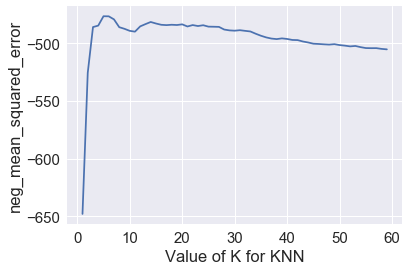

In [1324]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('neg_mean_squared_error')

In [1333]:
random.seed(0)
knn = KNeighborsRegressor(n_neighbors=6) #tried different no and 14 has one of  the lowest mse
knn.fit(X_train[x_col_knn], y_train)
predictions = knn.predict(X_test[x_col_knn])

predictions

array([54.5       , 39.16666667, 62.5       , 83.5       , 66.16666667,
       83.33333333, 61.        , 65.83333333, 59.83333333, 77.16666667,
       56.83333333, 76.5       , 66.66666667, 70.5       , 68.16666667,
       68.5       , 55.83333333, 77.66666667, 52.83333333, 53.16666667,
       88.16666667, 74.66666667, 76.        , 40.33333333, 82.5       ,
       67.33333333, 63.66666667, 75.16666667, 55.5       , 62.33333333,
       71.33333333, 80.16666667, 55.5       , 66.16666667, 66.66666667,
       68.66666667, 72.83333333, 87.33333333, 60.33333333, 62.16666667,
       81.83333333, 84.16666667, 63.5       , 58.        , 57.66666667,
       65.33333333, 82.        , 78.66666667, 85.66666667, 39.        ,
       85.16666667, 57.66666667, 72.16666667, 55.83333333, 58.        ,
       64.83333333, 57.        , 54.16666667, 87.33333333, 64.        ,
       62.66666667, 65.33333333, 72.66666667, 85.        , 84.83333333,
       70.33333333, 69.16666667, 68.16666667, 63.66666667, 84.33

In [1334]:
actual = y_test
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

328.30071461502996

In [1337]:
predictions_lotfrontage = knn.predict(test_knn_LotFrontage[x_col_knn])
train_normalized_dummies.loc[train_normalized_dummies["LotFrontage"].isna(),"LotFrontage"] = predictions_lotfrontage

predictions_lotfrontage 

array([ 76.16666667,  70.33333333,  78.        ,  74.66666667,
        66.66666667,  75.33333333,  69.        ,  69.        ,
        71.83333333,  81.83333333,  83.33333333,  65.66666667,
        70.66666667,  80.33333333,  74.83333333,  77.83333333,
        68.16666667,  80.        ,  87.66666667,  70.66666667,
        73.66666667,  80.66666667,  70.5       ,  77.83333333,
        80.16666667,  77.33333333,  72.33333333,  67.33333333,
        70.5       ,  74.83333333,  86.33333333,  59.16666667,
        62.83333333,  28.16666667,  65.16666667,  60.83333333,
        49.5       ,  68.16666667,  69.33333333,  59.        ,
        89.66666667,  83.        ,  75.16666667,  79.16666667,
        72.16666667,  74.        ,  89.83333333,  58.        ,
        74.5       ,  68.16666667,  58.        ,  56.33333333,
        80.66666667,  80.66666667,  57.66666667,  73.16666667,
        61.66666667,  68.33333333,  76.83333333,  76.16666667,
        63.66666667,  68.66666667,  70.66666667,  61.  

In [1338]:
sum(train_normalized_dummies["LotFrontage"].isna())

0

In [1339]:
#testing another imputation method
# train_dummies2 = train.copy()
# #train_dummies2["LotFrontage"] = 
# train_dummies2.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

(array([ 54.,  77., 159., 370., 390., 252.,  80.,  35.,  19.,   9.,   5.,
          4.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([ 21.  ,  32.68,  44.36,  56.04,  67.72,  79.4 ,  91.08, 102.76,
        114.44, 126.12, 137.8 , 149.48, 161.16, 172.84, 184.52, 196.2 ,
        207.88, 219.56, 231.24, 242.92, 254.6 , 266.28, 277.96, 289.64,
        301.32, 313.  ]),
 <a list of 25 Patch objects>)

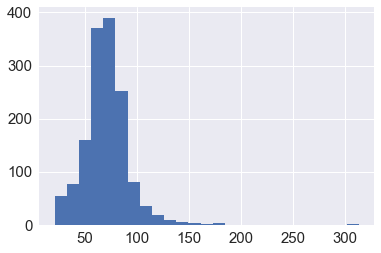

In [1341]:
plt.hist(train_normalized_dummies["LotFrontage"], bins=25)

In [1342]:
skew(train_normalized_dummies["LotFrontage"])

2.2115485939528003

In [1344]:
train_normalized_dummies["LotFrontage"] = np.log1p(train_normalized_dummies["LotFrontage"])

(array([ 23.,  19.,   1.,  11.,  27.,  19.,  34.,  78.,  78., 232., 185.,
        288., 246., 104.,  57.,  21.,  19.,   7.,   5.,   4.,   0.,   0.,
          0.,   0.,   2.]),
 array([3.09104245, 3.19737647, 3.3037105 , 3.41004452, 3.51637854,
        3.62271256, 3.72904658, 3.8353806 , 3.94171462, 4.04804865,
        4.15438267, 4.26071669, 4.36705071, 4.47338473, 4.57971875,
        4.68605277, 4.79238679, 4.89872082, 5.00505484, 5.11138886,
        5.21772288, 5.3240569 , 5.43039092, 5.53672494, 5.64305896,
        5.74939299]),
 <a list of 25 Patch objects>)

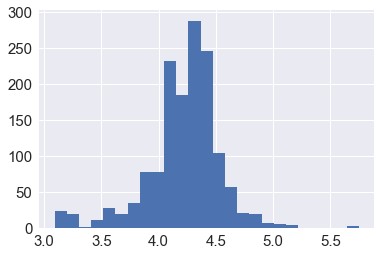

In [1347]:
plt.hist(train_normalized_dummies["LotFrontage"], bins=25)

In [1349]:
skew(train_normalized_dummies["LotFrontage"])

-0.8481549822707479